<a href="https://colab.research.google.com/github/jevabrir/Segmentacion_K-Means_OAPAS_Mex-Inegi/blob/main/2_Proy_OAPAS_JessicaBrise%C3%B1o_23102024a_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Segmentación de los organismos Operadores de los servicios de Agua Potable, Alcantarillado y Saneamiento en México**

**Introducción**  

Las empresas u organizaciones encargadas de la prestación de los servicios de agua potable, alcantarillado y saneamiento en México se les conoce como OAPAS (Operador de Agua Potable, Alcantarillado y Saneamiento). El Instituto Nacional de Estadística y Geografía (INEGI) realizó durante el año 2022 el Censo Nacional de Gobiernos Municipales y Demarcaciones Territoriales de la Ciudad de México con el que se puede analizar la gestión y desempeño de la administración pública municipal y de las demarcaciones de la Ciudad de México. El módulo 5 del cenco contiene información sobre la gestión, administración, características técnicas y ambientales de la prestación de los servicios municipales de agua potable y saneamiento (INEGI, 2024).


**Planteamiento del problema**  
En el Censo Gubernamental Municipal se reporta un total de 2469 folios que corresponden con los OAPAS en los diferentes municipios de México. Este tipo de organismos presentan diferencias tanto en el tamaño (volumen servido o el número de clientes) como en su estructura, lo que ha dificultado el diseño de un método para clasificarlos. Es por lo que resulta esencial analizar y seleccionar algunos elementos del  Censo Gubernamental Municipal, que tienen importancia para agrupar y caracterizar a los OAPAS en México, con el propósito lograr una comprensión de la relación entre los OAPAS clasificados y diseñar políticas públicas acordes a cada grupo.


**Objetivo**  

El principal objetivo principal de este trabajo es segmentar a los prestadores de los servicios de agua potable, alcantarillado y saneamiento que se encuentran en México, a partir de los datos abiertos del Censo Nacional de Gobiernos Municipales y Demarcaciones Territoriales de la Ciudad de México 2022 (INEGI,2022), utilizando aprendizaje no supervisado (K-Means y Hierarchical) para lograr una caracterización y comprensión de la relación de las variables que estos prestadores de servicios tienen en común.

Para lograr el objetivo se desarrollan los siguientes objetivos específicos:
*  Descargar los diversos archivos con formato .csv correspondientes al Censo Nacional de Gobiernos Municipales y Demarcaciones Territoriales de la Ciudad de México 2022 de la página de INEGI, para diseñar una dataset con los datos requeridos para el análisis.
*  Descargar el archivo con formato .csv correspondiente al Censo y Conteos de Población y Vivienda (datos de 2020) para obtener la población municipal y unirla al dataset para el análisis.
*  Realizar un análisis exploratorio de los datos para revisar los valores faltantes, identificar datos atípicos, imputar valores y seleccionar las variables para llevar el análisis.
*  Realizar el preprocesamiento necesario, así como implementar los algoritmos K-Means e Hierarchical para segmentar a los prestadores de los servicios de agua potable y alcantarillado.
*  Utilizando la métrica de rendimiento “Silhouette score”, identificar el mejor algoritmo de clasificación e implementarlo para clasificar a los OAPAS.
*  Realizar la caracterización y descripción de la segmentación de los OAPAS.


Autora: **Jessica Briseño**  
Contacto: **jevabrir@gmail.com**

_________________________________

# **1. Imporación de datos de INEGI**  

### **Importación de librerías**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import DBSCAN
pd.set_option("display.float_format", "{:,.2f}".format)   # Ajusta formato en df
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

### **Importación archivo del Censo y Conteos de Población y Vivienda**


Se utiliza la función ***download_and_read_csv_from_zip(url, csv_path)** para descargar los archivos requeridos para el análisis a partir de la dirección url proporcionada.

El link de descarga del **Censo y Conteos de Población y Vivienda (datos de 2020)** para obtener la población muicipal.La liga para acceder a la consulta de los datos abiertos es la siguiente:
https://www.inegi.org.mx/app/descarga/ficha.html?tit=326108&ag=0&f=csv

        Archivo                          Dataframe
    conjunto_de_datos_iter_00CSV20.csv   df_Censo2020




El siguiente código contiene la función para importar los archivos en conformato .csv y que se encuentran comprimidos en formato zip. La función requiere un link así como nombre del archivo y la información la guarda dentro de un dataframe de pandas.

In [5]:
# @title
# Función para:  a) descargar un archivo ZIP desde una URL
# b) leer un archivo CSV específico y c) guardarlo en df

import requests
import zipfile
import io

def download_and_read_csv_from_zip(url: str, csv_path: str) -> pd.DataFrame:
    # Descarga el archivo ZIP
    response = requests.get(url)
    if response.status_code == 200:
        # Abrir el archivo ZIP desde el contenido descargado
        with zipfile.ZipFile(io.BytesIO(response.content)) as z:
            # Listar los archivos contenidos en el ZIP para ver las rutas
            z.printdir()

            # Leer el archivo CSV específico de la subcarpeta
            with z.open(csv_path) as f:
                # Cargar el CSV en un DataFrame de pandas
                df = pd.read_csv(f, dtype=str)   #Lee como string todo
        return df
    else:
        print(f"Error al descargar el archivo: {response.status_code}")
        return None


In [6]:
# Archivo:sconjunto_de_datos_iter_00CSV20.csv    iter_00_cpv2020    #Datos del censo de población INEGI 2020
url = "https://www.inegi.org.mx/contenidos/programas/ccpv/2020/datosabiertos/iter/iter_00_cpv2020_csv.zip"

csv_path = 'iter_00_cpv2020/conjunto_de_datos/conjunto_de_datos_iter_00CSV20.csv'

df_Censo2020 = download_and_read_csv_from_zip(url, csv_path)
print("\nDataframe creado df_Censo2020 con tamaño:", df_Censo2020.shape)


File Name                                             Modified             Size
iter_00_cpv2020/catalogos/                     2022-03-11 13:42:56            0
iter_00_cpv2020/catalogos/tam_loc.csv.csv      2022-03-10 16:02:36          432
iter_00_cpv2020/conjunto_de_datos/             2022-03-15 09:20:44            0
iter_00_cpv2020/conjunto_de_datos/conjunto_de_datos_iter_00CSV20.csv 2022-03-07 13:19:18    149660864
iter_00_cpv2020/diccionario_datos/             2022-03-15 09:20:52            0
iter_00_cpv2020/diccionario_datos/diccionario_datos_iter_00CSV20.csv 2022-03-11 17:06:02        71632
iter_00_cpv2020/metadatos/                     2021-01-19 12:50:32            0
iter_00_cpv2020/metadatos/metadatos_iter_00_cpv2020.txt 2022-05-17 17:18:30         2105

Dataframe creado df_Censo2020 con tamaño: (195662, 286)


### **Importación archivos del Censo Nacional de Gobiernos Municipales y Demarcaciones Territoriales de la Ciudad de México 2022**


El link de descarga de los datos abiertos del censo **Censo Nacional de Gobiernos Municipales y Demarcaciones Territoriales de la Ciudad de México 2022** es el siguiente:
https://www.inegi.org.mx/programas/cngmd/2021/#datos_abiertos  

Los archivos del censo con los que se trabajará en este proyecto corresponden al subtema del censo **Agua potable y saneamiento**. Con cada uno de los archivos descargados se generará un dataframe. Los archivos a descargar del Censo y el nombre del dataframe correspondiente se muestran a continuación:

          Archivo                          Dataframe
    servagua_cngmd2021.csv               df_servagua
    admncion_cngmd2021.csv               df_admncion
    servdrencngmd2021.csv                df_servdren


In [7]:
# Archivo: servagua_cngmd2021.csv    Subtema: servicio_agua_red_publica

url1 =      "https://www.inegi.org.mx/contenidos/programas/cngmd/2021/datosabiertos/m5/servicio_agua_red_publica_cngmd2021_csv.zip"
csv_path1 = 'conjunto_de_datos/servagua_cngmd2021.csv'
df_servagua = download_and_read_csv_from_zip(url1, csv_path1)  # Función leer archivo Censo

print("\nDataframe creado df_servagua con tamaño:", df_servagua.shape)
print(df_servagua.shape)
df_servagua.head(3)

File Name                                             Modified             Size
catalogos/                                     2022-06-20 18:26:28            0
catalogos/ag_pipas_cngmd2021.csv               2022-04-28 15:33:40           61
catalogos/ag_servi_cngmd2021.csv               2022-04-28 15:35:00           61
catalogos/ambito_cngmd2021.csv                 2022-04-28 15:36:48          337
catalogos/atribuci_cngmd2021.csv               2022-04-28 15:37:10           95
catalogos/entidad_cngmd2021.csv                2022-04-28 12:34:14          523
catalogos/inspartc_cngmd2021.csv               2022-04-28 15:39:24          315
catalogos/insrepng_cngmd2021.csv               2022-04-28 15:39:46          291
catalogos/localid_cngmd2021.csv                2022-06-20 18:23:14     10050716
catalogos/mnpio_cngmd2021.csv                  2022-04-28 12:35:02        60821
catalogos/par_ciud_cngmd2021.csv               2022-04-28 15:40:48           61
catalogos/regjurid_cngmd2021.csv        

,folio,ag_servi,pobl_prc,no_sabe,tot_pres
0,1001,1,99,NaN,2
1,1002,1,70,NaN,1
2,1003,1,99,NaN,1


In [8]:
# Archivo:/admncion_cngmd2021.csv   Subtema: Adminsitración
url2 =      "https://www.inegi.org.mx/contenidos/programas/cngmd/2021/datosabiertos/m5/administracion_cngmd2021_csv.zip"
csv_path2 = 'conjunto_de_datos/admncion_cngmd2021.csv'
df_admncion = download_and_read_csv_from_zip(url2, csv_path2)

print("\nDataframe creado df_admncion con tamaño:", df_admncion.shape)
df_admncion.head(3)

File Name                                             Modified             Size
catalogos/                                     2022-04-29 12:08:24            0
catalogos/ajtarcnf_cngmd2021.csv               2022-04-29 11:25:18          359
catalogos/ajutarec_cngmd2021.csv               2022-04-29 11:25:58          116
catalogos/aj_tarif_cngmd2021.csv               2022-04-29 11:25:00           61
catalogos/entidad_cngmd2021.csv                2022-04-28 12:34:14          523
catalogos/esq_agua_cngmd2021.csv               2022-04-29 11:33:14           61
catalogos/factu_ag_cngmd2021.csv               2022-04-29 11:51:22           61
catalogos/fac_cufi_cngmd2021.csv               2022-04-29 11:42:26           61
catalogos/fac_srvm_cngmd2021.csv               2022-04-29 11:51:06           61
catalogos/frecfac2_cngmd2021.csv               2022-04-29 11:51:52           94
catalogos/frecfact_cngmd2021.csv               2022-04-29 11:52:16           94
catalogos/mnpio_cngmd2021.csv           

,folio,con_ex_p,dis_ex_p,res_ex_p,con_re_p,dis_re_p,res_re_p,totl_tom,tom_mun,tom_loc,...,der_alca,vnt_lodo,agua_pip,otro_ing,sub_fede,sub_esta,sub_muni,multas,ej_anter,total_in
0,1001,306.26,2468.87,NaN,2117.01,4597.56,NaN,329552,NSS,NSS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,889622823.43
1,1002,300,300,2,NSS,NSS,NSS,14473,1350,13123,...,84243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,914517
2,1003,74.86,236.76,NaN,NaN,NaN,NaN,16871,8670,8201,...,2354701,887601,17964,45870,2220575,NaN,NaN,314296,1464280,42545534


In [9]:
# Archivo:servdren_cngmd2021.csv   Subtema: Drenaje y alcantarillado
url3 =      "https://www.inegi.org.mx/contenidos/programas/cngmd/2021/datosabiertos/m5/drenaje_y_alcantarillado_cngmd2021_csv.zip"
csv_path3 = 'conjunto_de_datos/servdren_cngmd2021.csv'
df_servdren = download_and_read_csv_from_zip(url3, csv_path3)

print("\nDataframe creado df_servdren con tamaño:", df_servdren.shape)
print(df_servdren.shape)
df_servdren.head(3)

File Name                                             Modified             Size
catalogos/                                     2022-06-20 18:26:52            0
catalogos/ambito_cngmd2021.csv                 2022-04-29 12:18:38          337
catalogos/dren_plu_cngmd2021.csv               2022-04-29 12:19:02           61
catalogos/entidad_cngmd2021.csv                2022-04-28 12:34:14          523
catalogos/localid_cngmd2021.csv                2022-06-20 18:23:14     10050716
catalogos/mnpio_cngmd2021.csv                  2022-04-28 12:35:02        60821
catalogos/prodrplu_cngmd2021.csv               2022-04-29 12:19:50          166
catalogos/regjurid_cngmd2021.csv               2022-04-29 12:23:58          462
catalogos/serv_dre_cngmd2021.csv               2022-04-29 12:28:20           61
catalogos/trat_plu_cngmd2021.csv               2022-04-29 12:28:44           61
catalogos/usoprinc_cngmd2021.csv               2022-04-29 12:29:06          189
conjunto_de_datos/                      

,folio,serv_dre,dren_cab,no_saben,dren_plu,prodrplu,pr_plu_e,trat_plu,tra_apli,usoprinc,...,tot_conx,con_cabe,conx_loc,conx_dom,conx_ind,conx_com,conx_pub,conx_mix,conx_tot,prest_nu
0,1001,1,98,NaN,1,1,NaN,0,0,0,...,324115,NSS,NSS,302574,20372,319,850,NaN,324115,1
1,1002,1,80,NaN,2,0,NaN,0,NaN,0,...,13738,1300,12438,13713,NaN,25,NaN,NaN,13738,1
2,1003,1,98,NaN,1,2,NaN,2,NaN,0,...,19288,8809,10479,17586,11,1691,NaN,NaN,19288,1


In [10]:
print("\nDataframe creado df_Censo2020 con tamaño:", df_Censo2020.shape)
print("\nDataframe creado df_servagua con tamaño:", df_servagua.shape)
print("\nDataframe creado df_admncion con tamaño:", df_admncion.shape)
print("\nDataframe creado df_servdren con tamaño:", df_servdren.shape)


Dataframe creado df_Censo2020 con tamaño: (195662, 286)

Dataframe creado df_servagua con tamaño: (2469, 5)

Dataframe creado df_admncion con tamaño: (2469, 73)

Dataframe creado df_servdren con tamaño: (2469, 35)


In [11]:
# Seleccionar las columnas deseadas de df_Censo2020
df_Censo2020_selected = df_Censo2020[['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'POBTOT']]
print(df_Censo2020_selected.shape)
df_Censo2020_selected.head(4)

(195662, 7)


,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,POBTOT
0,00,Total nacional,000,Total nacional,0000,Total nacional,126014024
1,00,Total nacional,000,Total nacional,9998,Localidades de una vivienda,250354
2,00,Total nacional,000,Total nacional,9999,Localidades de dos viviendas,147125
3,01,Aguascalientes,000,Total de la entidad Aguascalientes,0000,Total de la Entidad,1425607


In [12]:
# Filtrar del df del Censo solo "Total del Municipio"
df_Censo2020_selected_total_municipio = df_Censo2020_selected[
    (df_Censo2020_selected['NOM_LOC'] == 'Total del Municipio')].copy()

print(df_Censo2020_selected_total_municipio.shape)
df_Censo2020_selected_total_municipio.sample(4)

(2469, 7)


,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,POBTOT
11873,04,Campeche,009,Escárcega,0000,Total del Municipio,59923
109308,19,Nuevo León,004,Allende,0000,Total del Municipio,35289
128795,21,Puebla,081,Ixcamilpa de Guerrero,0000,Total del Municipio,4065
167652,29,Tlaxcala,037,Ziltlaltépec de Trinidad Sánchez Santos,0000,Total del Municipio,9207


In [13]:
# Filtrado Población Total por estado
df_Censo2020_selected_total_municipio["POBTOT"]=df_Censo2020_selected_total_municipio["POBTOT"].astype(int)
df_Censo2020_selected_total_municipio.groupby('NOM_ENT', as_index=False)['POBTOT'].sum()

,NOM_ENT,POBTOT
0,Aguascalientes,1425607
1,Baja California,3769020
2,Baja California Sur,798447
3,Campeche,928363
4,Chiapas,5543828
5,Chihuahua,3741869
6,Ciudad de México,9209944
7,Coahuila de Zaragoza,3146771
8,Colima,731391
9,Durango,1832650


In [14]:
df_Censo2020_selected_total_municipio['POBTOT'].sum()

126014024

In [15]:
# Creación de columna folio en df
df_Censo2020_selected_total_municipio["folio"]=df_Censo2020_selected_total_municipio["ENTIDAD"]+df_Censo2020_selected_total_municipio["MUN"]
cols = list(df_Censo2020_selected_total_municipio.columns)
df_Censo2020_selected_total_municipio = df_Censo2020_selected_total_municipio[ [cols[-1]] + cols[:-1] ]  # Cambio columna folio al inicio
df_Censo2020_selected_total_municipio.sample(3)

,folio,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,POBTOT
117210,20117,20,Oaxaca,117,San Bartolomé Loxicha,0000,Total del Municipio,2213
122309,20394,20,Oaxaca,394,Santa María Alotepec,0000,Total del Municipio,2796
26365,07052,07,Chiapas,052,Las Margaritas,0000,Total del Municipio,141027


In [24]:
# Unión de dataframes para crear el df_datos con los datos para el análisis
#how='inner': Solo se incluyen las filas donde las claves existen en ambos DataFrames.

df_datos = df_admncion.merge(df_servagua, on='folio', how='inner') \
                .merge(df_servdren, on='folio', how='inner')

print("Tamaño  df_servagua :",df_servagua.shape)
print("Tamaño  df_admncion :",df_admncion.shape)
print("Tamaño  df_servdren :",df_servdren.shape)
print("Tamaño  df_datos unido:",df_datos.shape)

Tamaño  df_servagua : (2469, 5)
Tamaño  df_admncion : (2469, 73)
Tamaño  df_servdren : (2469, 35)
Tamaño  df_datos unido: (2469, 111)


In [21]:
#df_datos.to_excel('df_datos.xlsx', index=False, engine='openpyxl')   # Exportar df a Excel

In [25]:
# En el df para el proyecto se seleccionan únicamente las columnas especificadas
columnas_necesarias = ["folio", "totl_tom", "tot_conx", "pobl_prc", "dren_cab", "total_in"]
df_datos = df_datos[columnas_necesarias].copy()

nuevos_nombres = {             # Se crea diccionario para cambiar nombres col
    "folio": "folio",
    "totl_tom": "Tot_TomasAP",
    "tot_conx": "Tot_ConexDr",
    "pobl_prc": "Por_Pob_AP",
    "dren_cab": "Por_Pob_Dr",
    "total_in": "Tot_Ingreso"
}

# Cambiar los nombres de las columnas
df_datos.rename(columns=nuevos_nombres, inplace=True)
print(df_datos.shape)
df_datos.head(3)

(2469, 6)


,folio,Tot_TomasAP,Tot_ConexDr,Por_Pob_AP,Por_Pob_Dr,Tot_Ingreso
0,1001,329552,324115,99,98,889622823.43
1,1002,14473,13738,70,80,914517
2,1003,16871,19288,99,98,42545534


In [26]:
df_Censo2020_selected_total_municipio["folio"]=df_Censo2020_selected_total_municipio["folio"].astype(int)
df_datos["folio"]=df_datos["folio"].astype(int)

df_Censo2020_selected_total_municipio["NOM_ENT"]=df_Censo2020_selected_total_municipio["NOM_ENT"].astype(str)
df_Censo2020_selected_total_municipio["NOM_MUN"]=df_Censo2020_selected_total_municipio["NOM_MUN"].astype(str)

In [27]:
# Realizar la unión con base en la columna 'folio'
df_merged = pd.merge(df_Censo2020_selected_total_municipio, df_datos,  on='folio', how='inner')

# Mostrar el DataFrame resultante
print(df_merged.shape)
#df_merged.sample(5)
df_merged = df_merged.drop(columns=['LOC', 'NOM_LOC'])
df = df_merged.copy()  # Paso 1: Crear una copia del DataFrame original
print(df.shape)
df.sample(5)

(2469, 13)
(2469, 11)


,folio,ENTIDAD,NOM_ENT,MUN,NOM_MUN,POBTOT,Tot_TomasAP,Tot_ConexDr,Por_Pob_AP,Por_Pob_Dr,Tot_Ingreso
1409,20401,20,Oaxaca,401,Santa María Colotepec,27046,4272,100,95,45,545613130.15
395,12022,12,Guerrero,022,Coyuca de Catalán,38554,2687,2687,15,15,386344.5
2387,31083,31,Yucatán,083,Telchac Puerto,1915,750,NaN,100,NaN,1512000
1058,20050,20,Oaxaca,050,Magdalena Peñasco,3750,150,NaN,12,NaN,7700
767,15104,15,México,104,Tlalnepantla de Baz,672202,153989,153503,99.7,98.94,883097708.22


In [ ]:
# df.to_excel('datos.xlsx', index=False, engine='openpyxl')   # Exportar df a Excel

# **2. Análisis Exploratorio**  
_____

El dataframe **df** creado con con las variables seleccionadas para el análisis esta conformado por

*  **folio** es el identificador de cada cuestionario y esta compuesto por la clave de entidad y por la clave de municipio o delegación  
*  **ENTIDAD** es el identificador númerico de la entidad  
*  **NOM_ENT** es el nombre de la entidad  
*  **MUN** es el identificador númerico del municipio  
*  **NOM_MUN** es el nombre del muniicipio  
*  **POBTOT** población municipal (habitantes) Censo INEGI 2020    
*  **Tot_TomasAP** indica el número total de tomas que cubre el servicio de agua entubada de la red pública  
*  **Tot_ConexDr** indica el total de número de conexiones a la red de drenaje y alcantarillado por tipo de usuario   
*  **Por_Pob_Dr** indica el porcentaje de la población del municipio o de la demarcación territorial que tenia acceso al servicio de drenaje y alcantarillado de la red pública  
*  **Por_Pob_AP** indica el porcentaje de población municipal o demarcación territorial que contaba con acceso al servicio de agua de la red pública
* **Tot_Ingreso** indica el ingreso por el suministro de agua potable y saneamiento durante el año 2020 (total de ingresos por suministro de bienes y servicios)  

En esta sección, se realiza un análisis exploratorio del DataFrame `df`, que contiene la información previamente descrita, con el objetivo de entender la estructura de los datos, identificar patrones, relaciones y posibles anomalías.  
  

**Pasos del Análisis:**

1. **Revisión general del DataFrame**: Se visualizarán las primeras filas para tener una idea del contenido y el formato.
2. **Distribución de valores nulos**: Se identificará la presencia de valores faltantes o nulos.
3. **Estadísticas descriptivas**: Se calcularán métricas básicas (media, mediana, desviación estándar, etc.) para obtener un resumen de los datos numéricos.
4. **Visualización de la distribución de las variables**: Se generarán gráficos para observar la distribución de las variables más relevantes.

Este análisis nos permitirá obtener una mejor comprensión de los datos antes de aplicar cualquier modelo predictivo o realizar análisis más avanzados.

### **2.1 Revisión general del DataFrame**

Se visualizan las primeras filas para tener una idea del contenido y se revisa la estructura del DataFrame df.

In [28]:
df.sample(5)  # Despliega 5 renglones aleatorios del df

,folio,ENTIDAD,NOM_ENT,MUN,NOM_MUN,POBTOT,Tot_TomasAP,Tot_ConexDr,Por_Pob_AP,Por_Pob_Dr,Tot_Ingreso
233,8028,08,Chihuahua,028,Guadalupe,4237,3385,3000,80,60,4165293.3
1995,28006,28,Tamaulipas,006,Bustamante,7542,900,68,10,10,NaN
649,14111,14,Jalisco,111,Valle de Guadalupe,6627,2516,2129,90,90,3167832.11
1282,20274,20,Oaxaca,274,San Miguel Piedras,1328,157,NaN,80,NaN,7396
2212,30120,30,Veracruz de Ignacio de la Llave,120,Oteapan,10343,5000,32,85,80,NaN


In [29]:
df.info()    # Resumen completo de df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   folio        2469 non-null   int64 
 1   ENTIDAD      2469 non-null   object
 2   NOM_ENT      2469 non-null   object
 3   MUN          2469 non-null   object
 4   NOM_MUN      2469 non-null   object
 5   POBTOT       2469 non-null   int64 
 6   Tot_TomasAP  2444 non-null   object
 7   Tot_ConexDr  1973 non-null   object
 8   Por_Pob_AP   2458 non-null   object
 9   Por_Pob_Dr   1906 non-null   object
 10  Tot_Ingreso  1855 non-null   object
dtypes: int64(2), object(9)
memory usage: 212.3+ KB


### **2.2 Distribución de valores nulos**

Se identifica la presencia de valores faltantes o nulos, así otros valores (NSS', 'ND', '') que contiene el df y que no permiten realizar el cálculo de los principales estadísticos.

In [30]:
# Función para contar cada valor específico en cada columna, incluyendo nulos y Non-Null
def contar_cada_valor(df_ex, valores):
    conteo = {}
    # Contar cada valor específico
    for valor in valores:
        conteo[valor] = (df_ex == valor).sum()  # Contar cuántas veces aparece el valor en cada columna
    # Contar valores nulos
    conteo['nulos'] = df_ex.isnull().sum()      # Agregar conteo de nulos
    # Calcular el número total de Non-Null
    conteo['Non-Null'] = df_ex.notnull().sum()  # Agregar conteo de Non-Null
    return conteo

valores_especificos = ['NSS', 'ND', '', 'NaN', pd.NA]

conteo_valores = contar_cada_valor(df, valores_especificos) # Obtiene conteo
conteo_df = pd.DataFrame(conteo_valores)                    # Convierte en df
conteo_df                                                   # Muestra el conteo


,NSS,ND,,NaN,<NA>,nulos,Non-Null
folio,0,0,0,0,0,0,2469
ENTIDAD,0,0,0,0,0,0,2469
NOM_ENT,0,0,0,0,0,0,2469
MUN,0,0,0,0,0,0,2469
NOM_MUN,0,0,0,0,0,0,2469
POBTOT,0,0,0,0,0,0,2469
Tot_TomasAP,91,15,0,0,0,25,2444
Tot_ConexDr,201,14,0,0,0,496,1973
Por_Pob_AP,46,0,0,0,0,11,2458
Por_Pob_Dr,0,0,0,0,0,563,1906


In [31]:
# Tranforma valores 'NSS', 'ND', '', y '<NA>' son reemplazados por pd.NA.
# Columnas convertidas a número

df_Inicial = df.copy()    # Crea copia del DataFrame df

df = df.replace(['NSS', 'ND', '', '<NA>'], pd.NA)

for column in df.columns:
    if column not in ["NOM_MUN","NOM_ENT"] and df[column].dtype == 'object':  # Excluir columnas específicas
        try:
            # Convierte la columna a numérica, si es posible, coercionando errores a NaN
            df[column] = pd.to_numeric(df[column], errors='coerce')
            # Convierte la columna numérica a Int64, asegurando el uso de pd.NA para nulos
            if df[column].notnull().all() and df[column].eq(df[column].astype(int)).all():
                df[column] = df[column].astype(pd.Int64Dtype())
        except ValueError:
            # Si la conversión falla, mantener como tipo object
            pass

In [32]:
conteo_valores = contar_cada_valor(df, valores_especificos) # Obtiene conteo
conteo_df = pd.DataFrame(conteo_valores)                              # Convierte en df
conteo_df                                                             # Muestra el conteo

,NSS,ND,,NaN,<NA>,nulos,Non-Null
folio,0,0,0,0,0,0,2469
ENTIDAD,0,0,0,0,0,0,2469
NOM_ENT,0,0,0,0,0,0,2469
MUN,0,0,0,0,0,0,2469
NOM_MUN,0,0,0,0,0,0,2469
POBTOT,0,0,0,0,0,0,2469
Tot_TomasAP,0,0,0,0,0,131,2338
Tot_ConexDr,0,0,0,0,0,711,1758
Por_Pob_AP,0,0,0,0,0,57,2412
Por_Pob_Dr,0,0,0,0,0,563,1906


### **2.3 Estadísticas descriptivas**

Se calculan las métricas descriptivas básicas (media, mediana, desviación estándar, etc.) del df para obtener un resumen de los datos numéricos.

Para tener una descripción adicional de las varaibles de estudio se generan las siguientes columnas al df:

*  **Pob/Tomas = Población Total municipal / Tomas totales de agua potable**  
    
Esta relación indica cuántas personas, en promedio, dependen de cada toma de agua potable.  
Un **valor alto ->** podría indicar una alta concentración de personas utilizando una sola toma de agua, lo que podría sugerir sobrecarga en la infraestructura.  
Un **valor bajo** podría indicar una mayor disponibilidad de tomas, lo que puede reflejar una buena cobertura de agua potable por parte del organismo operador.


*  **Pob/ConexDr = Población Total municipal / Conexiones totales de drenaje**  

Esta relación mide cuántas personas, en promedio, dependen de cada conexión de drenaje.  
Un **valor elevado** podría señalar que muchas personas están conectadas a una sola red de drenaje, lo que podría llevar a sobrecarga o problemas de infraestructura  
Un **valor bajo** indicaría una buena distribución y acceso a conexiones de drenaje, lo cual es positivo para la calidad de vida y la infraestructura sanitaria del municipio.


*  **Ingreso/PobTot = Igreso ANual al Organismo Operador/ Población Totalmunicipal**  

Esta relación mide cuánto ingreso anual obtiene el organismo operador por cada habitante del municipio.
Un **valor alto** podría indicar que el organismo operador está generando ingresos adecuados o incluso altos en relación con el tamaño de la población, lo que puede reflejar eficiencia en la recaudación o tarifas elevadas.  
Un **valor bajo** podría sugerir que los ingresos del organismo son





In [33]:
df["folio"]=df["folio"].astype(str)
df["MUN"]=df["MUN"].astype(str)
df["ENTIDAD"]=df["ENTIDAD"].astype(str)

In [34]:
df["Pob/Tomas"]=df["POBTOT"]/df["Tot_TomasAP"]
df["Pob/ConexDr"]=df["POBTOT"]/df["Tot_ConexDr"]
df["Ingreso/PobTot"]=df["Tot_Ingreso"]/df["POBTOT"]

In [35]:
pd.set_option("display.float_format", "{:,.2f}".format)   # Ajusta formato en df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
POBTOT,"2,469.00","51,038.49","146,990.73",81.00,"4,489.00","13,552.00","35,284.00","1,922,523.00"
Tot_TomasAP,"2,338.00","11,617.35","46,772.58",4.00,711.00,"2,051.50","6,000.00","1,170,135.00"
Tot_ConexDr,"1,758.00","12,430.25","48,135.82",3.00,653.75,"2,005.00","6,662.50","1,164,305.00"
Por_Pob_AP,"2,412.00",77.46,24.79,10.00,70.00,89.00,96.00,100.00
Por_Pob_Dr,"1,906.00",73.82,24.84,0.50,60.00,80.00,94.00,100.00
Tot_Ingreso,"1,777.00","50,885,566.95","414,168,338.01",321.00,"160,000.00","1,280,000.00","8,320,415.37","15,094,274,894.00"
Pob/Tomas,"2,338.00",18.79,285.76,0.21,3.12,4.69,8.60,"12,709.00"
Pob/ConexDr,"1,758.00",45.50,324.24,0.12,3.75,6.10,13.30,"7,502.20"
Ingreso/PobTot,"1,777.00",299.03,965.08,0.01,23.53,98.51,328.76,"27,838.38"


### **2.4 Visualización de la distribución de las variables**

Se generan gráficos para observar la distribución de las variables más relevantes. Se realizarán las siguientes gráficas:

*  **Gráfica de dispersión de las variables**
 Muestra las tomas totales de agua potable, Conexiones Totales de drenaje, Porcentajes de población servida de agua potable y drenaje, así como de la población, todas esta variables con respecto al ingreso total.

*  **Histograma de las variables**
 Muestra el histograma de las variables tomas totales de agua potable, Conexiones Totales de drenaje, Porcentajes de población servida de agua potable y drenaje, población total, e ingreso total. También se muestran los prinicpales estadísticos.




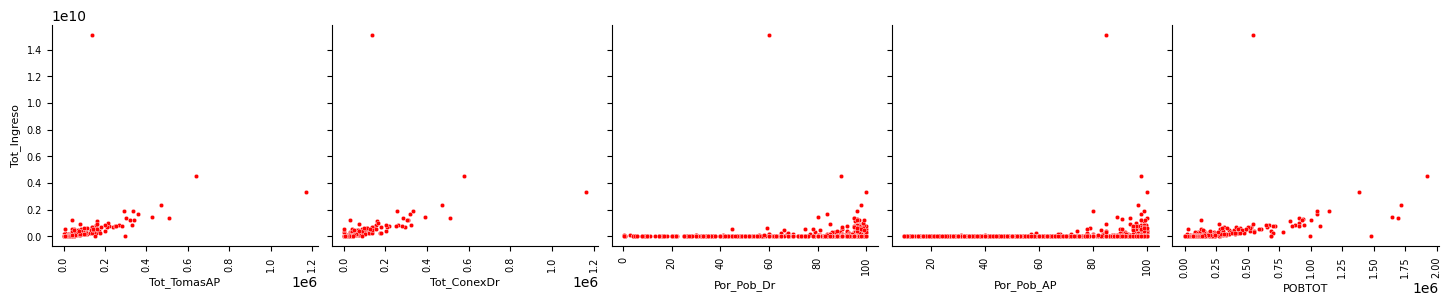

In [36]:
# @title
colors = ['red']
Col_Var_x1 = ['Tot_TomasAP', 'Tot_ConexDr', 'Por_Pob_Dr', 'Por_Pob_AP', 'POBTOT']
Col_Var_y = ['Tot_Ingreso']

# Crear el pairplot con una paleta de colores personalizada
g = sns.pairplot(df,x_vars=Col_Var_x1,y_vars=Col_Var_y,height=3, #hue='NOM_ENT',
    plot_kws={'s': 10, 'color': colors})  # s = tamaño de los puntos

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(axis='x', labelrotation=90, labelsize=7)
    ax.tick_params(axis='y', labelrotation=0, labelsize=7)


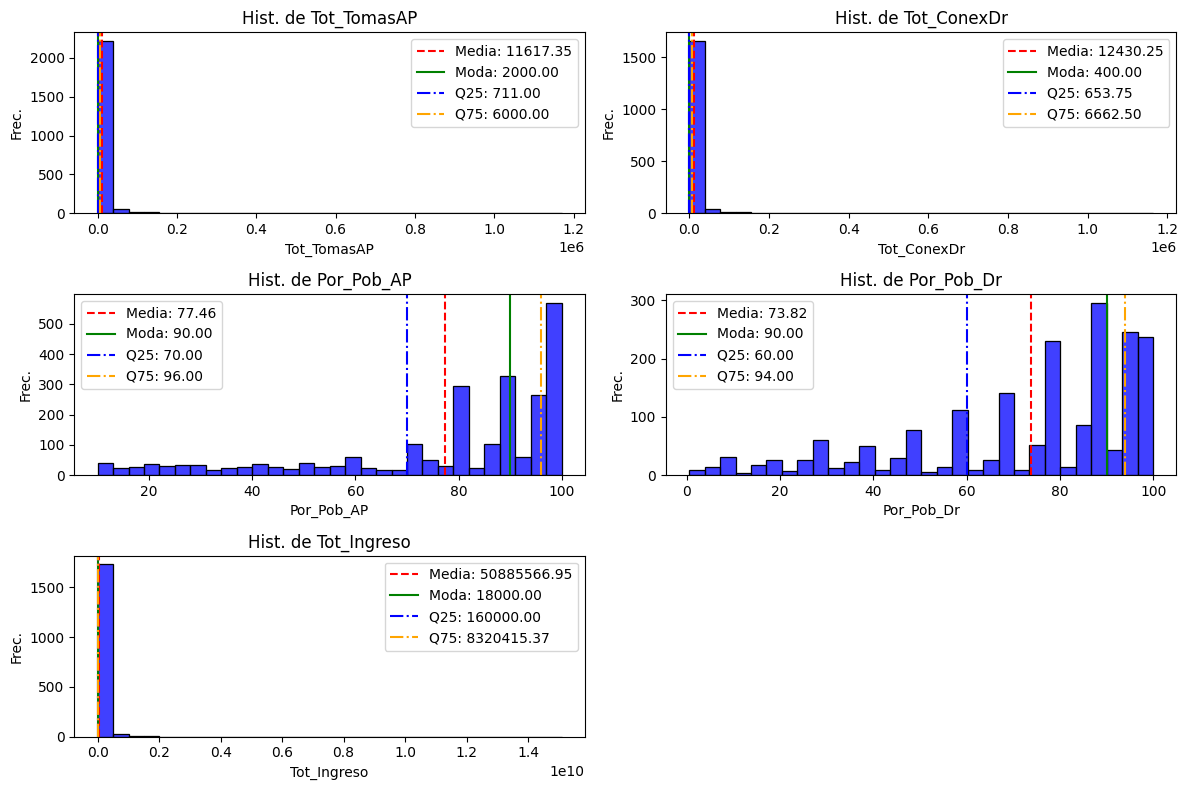

In [37]:
# @title
Col_Var_x1 = ['Tot_TomasAP', 'Tot_ConexDr', 'Por_Pob_AP', 'Por_Pob_Dr', 'Tot_Ingreso']

# Crear la figura y las subgráficas
plt.figure(figsize=(12, 8))

for col_x in Col_Var_x1:
    plt.subplot(3, 2, Col_Var_x1.index(col_x) + 1)  # Crear subgráficas en una cuadrícula 1x3

    # Graficar histograma
    sns.histplot(data=df, x=col_x, color='blue', bins=30, kde=False)

    # Calcular las estadísticas
    media = df[col_x].mean()
    moda = df[col_x].mode()[0]  # La moda puede devolver más de un valor, seleccionamos el primero
    cuartil_25 = df[col_x].quantile(0.25)
    cuartil_75 = df[col_x].quantile(0.75)

    # Agregar líneas verticales
    plt.axvline(media, color='r', linestyle='--', label=f'Media: {media:.2f}')
    plt.axvline(moda, color='g', linestyle='-', label=f'Moda: {moda:.2f}')
    plt.axvline(cuartil_25, color='b', linestyle='-.', label=f'Q25: {cuartil_25:.2f}')
    plt.axvline(cuartil_75, color='orange', linestyle='-.', label=f'Q75: {cuartil_75:.2f}')

    # Ajustar título y etiquetas
    plt.title(f'Hist. de {col_x}')
    plt.xlabel(col_x)
    plt.ylabel('Frec.')

    # Mostrar leyenda
    plt.legend()

# Ajustar el layout
plt.tight_layout()

# Mostrar las gráficas
plt.show()


### **2.5 Detección de valores de valores atípicos**  

En esta sección se realiza la detección de valores atípicos (outliers), para evitar que influyan significativamente en los resultados de la segmentación que se busca realizar. Debido a que las variables de estudio no muestran distribuciones normales, la detección de valores atípicos se realizará analizando los valores más altos y bajos de las variables de estudio y gráficas BoxPlot.

In [48]:
pd.set_option("display.float_format", "{:,.1f}".format)
Columnas=['folio','NOM_ENT','NOM_MUN', 'POBTOT','Tot_TomasAP', 'Tot_ConexDr', 'Por_Pob_AP', 'Por_Pob_Dr','Tot_Ingreso']

#### **2.5.1 Variable Tot_Ingreso**  


<Axes: >

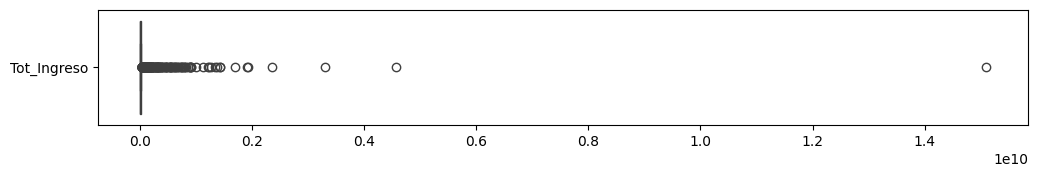

In [49]:
# @title
plt.figure(figsize=(12, 1.5))
sns.boxplot(data=df[['Tot_Ingreso']], orient='h')

In [50]:
df.sort_values("Tot_Ingreso",ascending=False).head(5)[Columnas]

,folio,NOM_ENT,NOM_MUN,POBTOT,Tot_TomasAP,Tot_ConexDr,Por_Pob_AP,Por_Pob_Dr,Tot_Ingreso
702,15039,México,Ixtapaluca,542211,"134,624.0","136,038.0",85.0,60.0,"15,094,274,894.0"
14,2004,Baja California,Tijuana,1922523,"637,449.0","578,966.0",98.0,89.6,"4,559,694,557.0"
577,14039,Jalisco,Guadalajara,1385629,"1,170,135.0","1,164,305.0",100.0,100.0,"3,299,290,059.0"
347,11020,Guanajuato,León,1721215,"469,797.0","470,367.0",97.0,98.0,"2,342,206,650.8"
996,19039,Nuevo León,Monterrey,1142994,"335,097.0","331,865.0",99.0,96.0,"1,913,074,129.0"


In [51]:
df.sort_values("Tot_Ingreso",ascending=True).head(5)[Columnas]

,folio,NOM_ENT,NOM_MUN,POBTOT,Tot_TomasAP,Tot_ConexDr,Por_Pob_AP,Por_Pob_Dr,Tot_Ingreso
1693,21115,Puebla,Quecholac,57992,221.0,NaN,20.0,90.0,321.0
1188,20180,Oaxaca,San Juan Bautista Lo de Soto,2344,540.0,482.0,90.0,80.0,"1,000.0"
1064,20056,Oaxaca,Mártires de Tacubaya,1446,300.0,NaN,66.0,NaN,"1,200.0"
1210,20202,Oaxaca,San Juan Lachao,4577,518.0,NaN,31.0,NaN,"1,200.0"
1438,20430,Oaxaca,Santa María Tataltepec,317,150.0,NaN,99.0,NaN,"1,260.0"


#### **2.5.2 Variables: Tot_TomasAP, Tot_ConexDr**  

<Axes: >

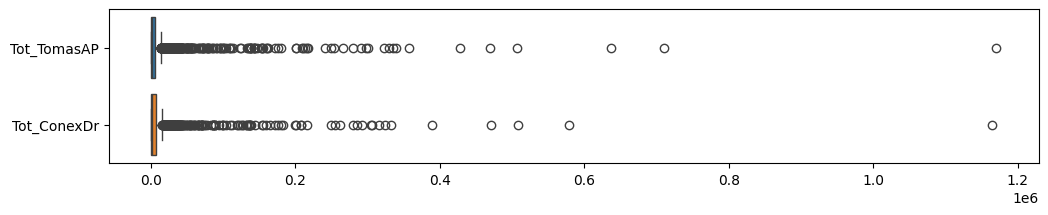

In [52]:
# @title
plt.figure(figsize=(12, 2))
sns.boxplot(data=df[['Tot_TomasAP','Tot_ConexDr']], orient='h')

- **Lista de 5 folios con ingresos mas altos y más bajos (Tot_TomasAP)**  

In [53]:
df.sort_values("Tot_TomasAP",ascending=False).head(5)[Columnas]

,folio,NOM_ENT,NOM_MUN,POBTOT,Tot_TomasAP,Tot_ConexDr,Por_Pob_AP,Por_Pob_Dr,Tot_Ingreso
577,14039,Jalisco,Guadalajara,1385629,"1,170,135.0","1,164,305.0",100.0,100.0,"3,299,290,059.0"
81,6010,Colima,Villa de Álvarez,149762,"710,766.0","65,505.0",100.0,98.0,NaN
14,2004,Baja California,Tijuana,1922523,"637,449.0","578,966.0",98.0,89.6,"4,559,694,557.0"
1692,21114,Puebla,Puebla,1692181,"506,375.0","507,618.0",94.0,95.0,"1,416,260,601.1"
347,11020,Guanajuato,León,1721215,"469,797.0","470,367.0",97.0,98.0,"2,342,206,650.8"


In [54]:
df.sort_values("Tot_TomasAP",ascending=True).head(5)[Columnas]

,folio,NOM_ENT,NOM_MUN,POBTOT,Tot_TomasAP,Tot_ConexDr,Por_Pob_AP,Por_Pob_Dr,Tot_Ingreso
2196,30104,Veracruz de Ignacio de la Llave,Mecayapan,17134,4.0,"10,000.0",34.0,70.0,NaN
2175,30083,Veracruz de Ignacio de la Llave,Ixhuatlán de Madero,50836,4.0,NaN,85.0,100.0,NaN
1629,21051,Puebla,Chietla,37030,13.0,NaN,15.0,1.0,"166,824.3"
2025,28036,Tamaulipas,San Nicolás,926,25.0,NaN,90.0,NaN,NaN
682,15019,México,Capulhuac,36921,30.0,"4,300.0",25.0,90.0,NaN


- **Gráfica del Ingreso en función del numero de tomas de agua potable**

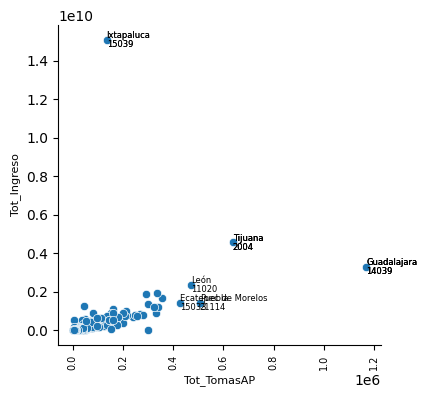

In [58]:
# @title

colors = ['red','red']    #'green', 'purple', 'orange'
Col_Var_x1 = ['Tot_TomasAP']
Col_Var_y = ['Tot_Ingreso']

g = sns.pairplot(
    df,
    x_vars=Col_Var_x1,
    y_vars=Col_Var_y,
    height=4,
    #hue='cluster_Kmean',
    palette=colors[0]
)

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(axis='x', labelrotation=90, labelsize=7)

top_20_indices = df['Tot_Ingreso'].nlargest(3).index
# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'Tot_Ingreso'
        for idx in top_20_indices:
            row = df.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['NOM_MUN'],
                fontsize=6,
                ha='left',
                va='bottom'
            )

top_20_indices = df['Tot_Ingreso'].nlargest(3).index
# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'Tot_Ingreso'
        for idx in top_20_indices:
            row = df.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['folio'],
                fontsize=6,
                ha='left',
                va='top'
            )


top_20_indices = df['Tot_Ingreso'].nlargest(3).index
# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'Tot_Ingreso'
        for idx in top_20_indices:
            row = df.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['NOM_MUN'],
                fontsize=6,
                ha='left',
                va='bottom'
            )

top_20_indices = df['Tot_Ingreso'].nlargest(3).index
# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'Tot_Ingreso'
        for idx in top_20_indices:
            row = df.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['folio'],
                fontsize=6,
                ha='left',
                va='top'
            )



top_20_indices = df['Tot_TomasAP'].nlargest(6).index
# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'Tot_Ingreso'
        for idx in top_20_indices:
            row = df.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['NOM_MUN'],
                fontsize=6,
                ha='left',
                va='bottom'
            )

top_20_indices = df['Tot_TomasAP'].nlargest(6).index
# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'Tot_Ingreso'
        for idx in top_20_indices:
            row = df.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['folio'],
                fontsize=6,
                ha='left',
                va='top'
            )

- **Lista de 5 folios con ingresos mas altos y más bajos (Tot_ConexDr)**




In [56]:
df.sort_values("Tot_ConexDr",ascending=False).head(5)[Columnas]

,folio,NOM_ENT,NOM_MUN,POBTOT,Tot_TomasAP,Tot_ConexDr,Por_Pob_AP,Por_Pob_Dr,Tot_Ingreso
577,14039,Jalisco,Guadalajara,1385629,"1,170,135.0","1,164,305.0",100.0,100.0,"3,299,290,059.0"
14,2004,Baja California,Tijuana,1922523,"637,449.0","578,966.0",98.0,89.6,"4,559,694,557.0"
1692,21114,Puebla,Puebla,1692181,"506,375.0","507,618.0",94.0,95.0,"1,416,260,601.1"
347,11020,Guanajuato,León,1721215,"469,797.0","470,367.0",97.0,98.0,"2,342,206,650.8"
696,15033,México,Ecatepec de Morelos,1645352,"428,144.0","389,221.0",89.0,80.0,"1,420,984,395.0"


In [57]:
df.sort_values("Tot_ConexDr",ascending=True).head(5)[Columnas]

,folio,NOM_ENT,NOM_MUN,POBTOT,Tot_TomasAP,Tot_ConexDr,Por_Pob_AP,Por_Pob_Dr,Tot_Ingreso
1962,26062,Sonora,Suaqui Grande,1114,466.0,3.0,95.0,95.0,"629,844.8"
779,15116,México,Zacazonapan,5109,"3,500.0",5.0,100.0,99.0,NaN
2261,30169,Veracruz de Ignacio de la Llave,José Azueta,22709,"2,968.0",8.0,32.0,27.0,"4,925,008.0"
1000,19043,Nuevo León,Rayones,2377,401.0,8.0,99.0,96.0,"555,630.2"
666,15003,México,Aculco,49266,"7,595.0",8.0,70.0,NaN,"10,668,254.2"


- **Gráfica del Ingreso en función del numero de conexiones de drenaje**

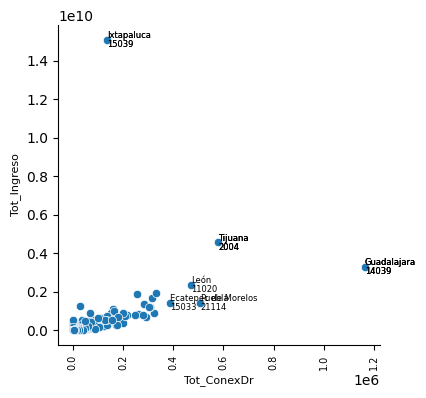

In [59]:
# @title
colors = ['red','red']    #'green', 'purple', 'orange'
Col_Var_x1 = ['Tot_ConexDr']
Col_Var_y = ['Tot_Ingreso']

g = sns.pairplot(
    df,
    x_vars=Col_Var_x1,
    y_vars=Col_Var_y,
    height=4,
    #hue='cluster_Kmean',
    palette=colors[0]
)

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(axis='x', labelrotation=90, labelsize=7)

top_20_indices = df['Tot_Ingreso'].nlargest(3).index
# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'Tot_Ingreso'
        for idx in top_20_indices:
            row = df.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['NOM_MUN'],
                fontsize=6,
                ha='left',
                va='bottom'
            )

top_20_indices = df['Tot_Ingreso'].nlargest(3).index
# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'Tot_Ingreso'
        for idx in top_20_indices:
            row = df.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['folio'],
                fontsize=6,
                ha='left',
                va='top'
            )


top_20_indices = df['Tot_Ingreso'].nlargest(3).index
# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'Tot_Ingreso'
        for idx in top_20_indices:
            row = df.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['NOM_MUN'],
                fontsize=6,
                ha='left',
                va='bottom'
            )

top_20_indices = df['Tot_Ingreso'].nlargest(3).index
# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'Tot_Ingreso'
        for idx in top_20_indices:
            row = df.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['folio'],
                fontsize=6,
                ha='left',
                va='top'
            )



top_20_indices = df['Tot_ConexDr'].nlargest(5).index
# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'Tot_Ingreso'
        for idx in top_20_indices:
            row = df.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['NOM_MUN'],
                fontsize=6,
                ha='left',
                va='bottom'
            )

top_20_indices = df['Tot_ConexDr'].nlargest(5).index
# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'Tot_Ingreso'
        for idx in top_20_indices:
            row = df.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['folio'],
                fontsize=6,
                ha='left',
                va='top'
            )

#### **2.5.3 Variables: Por_Pob_AP y Por_Pob_Dr**  

<Axes: >

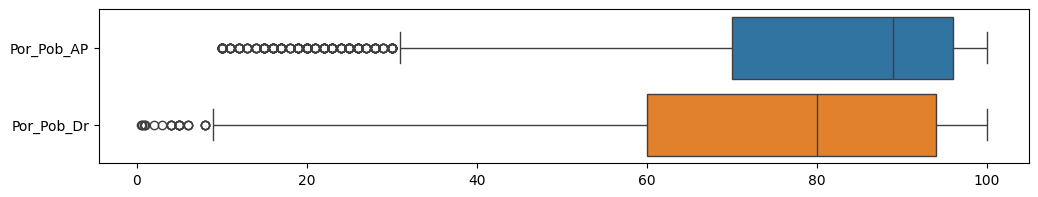

In [60]:
plt.figure(figsize=(12, 2))
sns.boxplot(data=df[['Por_Pob_AP','Por_Pob_Dr']], orient='h')

- **Lista de 5 folios con ingresos mas altos y más bajos (Por_Pob_AP)**

In [61]:
df.sort_values("Por_Pob_AP",ascending=False).head(5)[Columnas]

,folio,NOM_ENT,NOM_MUN,POBTOT,Tot_TomasAP,Tot_ConexDr,Por_Pob_AP,Por_Pob_Dr,Tot_Ingreso
1176,20168,Oaxaca,San José Estancia Grande,938,250.0,NaN,100.0,NaN,NaN
1187,20179,Oaxaca,San Juan Bautista Jayacatlán,1447,350.0,NaN,100.0,NaN,"40,800.0"
1224,20216,Oaxaca,San Juan Tabaá,1241,344.0,344.0,100.0,100.0,"30,000.0"
1204,20196,Oaxaca,San Juan Evangelista Analco,407,296.0,147.0,100.0,70.0,"508,000.0"
1201,20193,Oaxaca,San Juan del Estado,2807,900.0,NaN,100.0,NaN,"99,000.0"


In [62]:
df.sort_values("Por_Pob_AP",ascending=True).head(5)[Columnas]

,folio,NOM_ENT,NOM_MUN,POBTOT,Tot_TomasAP,Tot_ConexDr,Por_Pob_AP,Por_Pob_Dr,Tot_Ingreso
1995,28006,Tamaulipas,Bustamante,7542,900.0,68.0,10.0,10.0,NaN
1338,20330,Oaxaca,San Pedro Teutila,4296,500.0,NaN,10.0,NaN,NaN
1111,20103,Oaxaca,San Antonino Castillo Velasco,6064,116.0,"1,560.0",10.0,60.0,"48,760.0"
1647,21069,Puebla,Huaquechula,29233,"1,200.0","1,200.0",10.0,99.0,"110,612.0"
389,12016,Guerrero,Coahuayutla de José María Izazaga,12408,"1,164.0",402.0,10.0,10.0,NaN


- **Lista de 5 folios con ingresos mas altos y más bajos (Por_Pob_Dr)**

In [63]:
df.sort_values("Por_Pob_Dr",ascending=False).head(5)[Columnas]

,folio,NOM_ENT,NOM_MUN,POBTOT,Tot_TomasAP,Tot_ConexDr,Por_Pob_AP,Por_Pob_Dr,Tot_Ingreso
244,8039,Chihuahua,López,4122,"1,163.0","1,163.0",100.0,100.0,"1,748,999.0"
2061,29029,Tlaxcala,Tepeyanco,13328,"3,223.0","2,922.0",100.0,100.0,"261,223.0"
1307,20299,Oaxaca,San Pablo Yaganiza,1125,250.0,250.0,100.0,100.0,NaN
1255,20247,Oaxaca,Capulálpam de Méndez,1619,812.0,812.0,100.0,100.0,"65,270.0"
2040,29008,Tlaxcala,Cuapiaxtla,16222,"2,628.0",57.0,100.0,100.0,"1,440,931.0"


In [64]:
df.sort_values("Por_Pob_Dr",ascending=True).head(5)[Columnas]

,folio,NOM_ENT,NOM_MUN,POBTOT,Tot_TomasAP,Tot_ConexDr,Por_Pob_AP,Por_Pob_Dr,Tot_Ingreso
773,15110,México,Valle de Bravo,61590,"12,738.0",NaN,NaN,0.5,"66,019,070.0"
2223,30131,Veracruz de Ignacio de la Llave,Poza Rica de Hidalgo,189457,"40,805.0",NaN,82.0,0.6,"88,570,285.2"
2289,30197,Veracruz de Ignacio de la Llave,Yecuatla,11205,"1,117.0","1,177.0",28.0,0.6,"109,886.0"
2221,30129,Veracruz de Ignacio de la Llave,Platón Sánchez,18053,"3,675.0","2,147.0",95.0,0.8,"5,525,193.2"
1815,23002,Quintana Roo,Felipe Carrillo Puerto,83990,"18,886.0",116.0,98.0,1.0,"17,478,353.8"


#### **2.5.4 Variables: Pob/Tomas, Pob/ConexDr, Ingreso/PobTot**  

<Axes: >

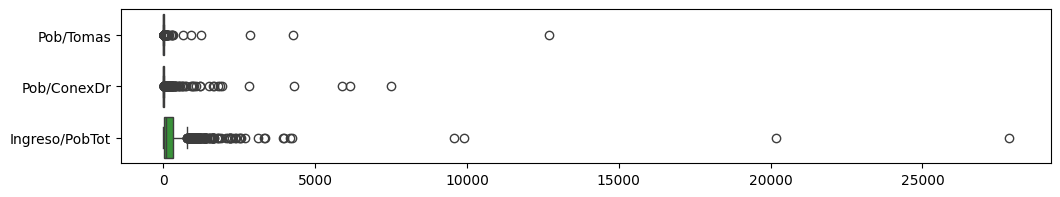

In [ ]:
plt.figure(figsize=(12, 2))
sns.boxplot(data=df_ID_Outlayers[['Pob/Tomas', 'Pob/ConexDr', 'Ingreso/PobTot']], orient='h')

### **2.6 Eliminación de valores de valores atípicos**  

Con base en el análisis de las tablas anteriores se determina:

*  El municipio con folio   **15039	Estado de México	Ixtapaluca	con Ingreso Totale de 15,094,274,894.0**
es un dato atípico.

*  Los siguientes municipios se analizarán de forma independiente como MegaCiudades debido a su tamañocon:
   *  **2004 Tijuana**
   *  **14039 Guadalajara**  
   *  **11020	León**  
   *  **21114 Puebla**
   *  **6010	Colima**
    .

*  En este proyecto se generó una función para calcular como datos atípicos a los valores mayores y menores a un determinado percentil. Los outlayers se calcularán con base en las columnas 'Pob/Tomas', 'Pob/ConexDr', 'Ingreso/PobTot', en donde los valores superiores al percentil 99.5 y menores al percentil 0.25 se consideran como datos atípicos.



In [65]:
df_ID_Outlayers=df.copy()

colss=['folio','NOM_ENT','NOM_MUN','Pob/Tomas', 'Pob/ConexDr', 'Ingreso/PobTot']
df_ID_Outlayers.sort_values("Ingreso/PobTot",ascending=False).head(5)[colss]

,folio,NOM_ENT,NOM_MUN,Pob/Tomas,Pob/ConexDr,Ingreso/PobTot
702,15039,México,Ixtapaluca,4.0,4.0,"27,838.4"
1409,20401,Oaxaca,Santa María Colotepec,6.3,270.5,"20,173.5"
15,2005,Baja California,Playas de Rosarito,3.0,4.2,"9,903.7"
2005,28016,Tamaulipas,Hidalgo,6.2,11.3,"9,565.7"
2182,30090,Veracruz de Ignacio de la Llave,Jamapa,2.4,NaN,"4,231.2"


In [67]:
# OutLayers: Valores considerados como MegaCiudades
List_OutL_Tot_Ingreso= df_ID_Outlayers.sort_values("Tot_Ingreso", ascending=False).head(3)['folio'].tolist()
List_OutL_Tot_TomasAP= df_ID_Outlayers.sort_values("Tot_TomasAP", ascending=False).head(6)['folio'].tolist()
List_OutL_Tot_ConexDr= df_ID_Outlayers.sort_values("Tot_ConexDr", ascending=False).head(4)['folio'].tolist()

List_OutLayers=List_OutL_Tot_Ingreso+List_OutL_Tot_TomasAP
List_OutLayers = list(set(List_OutLayers))
print("List_OutLayersMG :",len(List_OutLayers))
List_OutLayers     # El folio 15039 si es un outlayer y corresponde a Ixtapaluca

List_OutLayersMG : 7


['21114', '6010', '11020', '15039', '2004', '15033', '14039']

In [68]:
df_ID_Outlayers['OutLayer'] = df['folio'].apply(lambda x: 1 if x in List_OutLayers  else 0)  #df con ID de 'OutLayer'

df_Sin_Outlayers=df_ID_Outlayers[df_ID_Outlayers['OutLayer'] == 0]   #df sin outlayers
print(" df_Sin_Outlayers   :",df_Sin_Outlayers.shape)

df_Con_OutLayers=df_ID_Outlayers[df_ID_Outlayers['OutLayer'] == 1]
print(" df_Con_OutLayers :",df_Con_OutLayers.shape)

 df_Sin_Outlayers   : (2462, 15)
 df_Con_OutLayers : (7, 15)



Función eliminar valores mayores y menores del percentil especificado


In [69]:
# @title
# Función eliminar valores mayores y menores del percentil especificado

def valores_mayores_percentil(df_, cols, percentil):
    lista_folios = []
    for col in cols:
        perc_value = df_[col].quantile(percentil / 100)            # Calcular el percentil
        folios_mayores = df_['folio'].where(df_[col] > perc_value).dropna().tolist()
        lista_folios.extend(folios_mayores)
    lista_folios_unicos = list(set(lista_folios))                # Eliminar los folios duplicados
    return lista_folios_unicos

def valores_menores_percentil(df_, cols, percentil):
    lista_folios = []
    for col in cols:
        perc_value = df_[col].quantile(percentil / 100)            # Calcular el percentil
        folios_mayores = df_['folio'].where(df_[col] < perc_value).dropna().tolist()
        lista_folios.extend(folios_mayores)
    lista_folios_unicos = list(set(lista_folios))       # Eliminar los folios duplicados
    return lista_folios_unicos

In [70]:
# Cálculo de outlayers de columnas índice
cols = ['Pob/Tomas', 'Pob/ConexDr', 'Ingreso/PobTot']
lista_valores_may_per = valores_mayores_percentil(df_Sin_Outlayers, cols, 99.75)
lista_valores_men_per = valores_menores_percentil(df_Sin_Outlayers, cols, 0.25)
lista_OutlayersTot= List_OutLayers+ lista_valores_may_per + lista_valores_men_per

# Mostrar los valores únicos de folio que cumplen la condición
print("Número de outlayers iniciales: ",len(List_OutLayers))
print("Número de outlayer mayores al percentil 100: ",len(lista_valores_may_per))
print("Número de outlayer menores al percentil 0:  ",len(lista_valores_men_per))
print("\nNúmero de outlayers totales: ",len(lista_OutlayersTot))

Número de outlayers iniciales:  7
Número de outlayer mayores al percentil 100:  16
Número de outlayer menores al percentil 0:   14

Número de outlayers totales:  37


In [71]:
df_ID_Outlayers=df.copy()

df_ID_Outlayers['OutLayer'] = df['folio'].apply(lambda x: 1 if x in lista_OutlayersTot else 0)
print("df_ID_Outlayers :",df_ID_Outlayers.shape)                     #df ID outlayers

df_Con_OutLayers=df_ID_Outlayers[df_ID_Outlayers['OutLayer'] == 1]   #df con outlayers
print(" df_Con_OutLayers :",df_Con_OutLayers.shape)

df_Sin_Outlayers=df_ID_Outlayers[df_ID_Outlayers['OutLayer'] == 0]   #df SIN outlayers
print(" df_Sin_Outlayers   :",df_Sin_Outlayers.shape)
df_Analisys1=df_Sin_Outlayers.copy()    #df SIN outlayers = df_Analisys1

df_ID_Outlayers : (2469, 15)
 df_Con_OutLayers : (37, 15)
 df_Sin_Outlayers   : (2432, 15)


In [72]:
df_Analisys1.describe().T

,count,mean,std,min,25%,50%,75%,max
POBTOT,"2,432.0","47,012.2","125,822.8",130.0,"4,454.5","13,343.5","34,461.8","1,835,486.0"
Tot_TomasAP,"2,302.0","9,714.0","30,373.0",25.0,715.2,"2,038.5","5,991.5","356,964.0"
Tot_ConexDr,"1,733.0","10,556.9","32,175.9",3.0,663.0,"2,000.0","6,480.0","331,865.0"
Por_Pob_AP,"2,376.0",77.5,24.7,10.0,70.0,89.0,96.0,100.0
Por_Pob_Dr,"1,877.0",73.8,24.8,0.5,60.0,80.0,94.0,100.0
Tot_Ingreso,"1,748.0","33,914,606.0","143,589,018.7","1,000.0","160,089.2","1,273,142.5","8,087,551.5","1,913,074,129.0"
Pob/Tomas,"2,302.0",9.1,16.8,0.9,3.1,4.7,8.6,327.0
Pob/ConexDr,"1,733.0",30.0,132.8,1.0,3.8,6.1,13.2,"1,932.2"
Ingreso/PobTot,"1,748.0",252.2,388.2,0.3,23.7,98.0,321.2,"3,988.0"
OutLayer,"2,432.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Gráfica de dispersión de variables con outlayers**

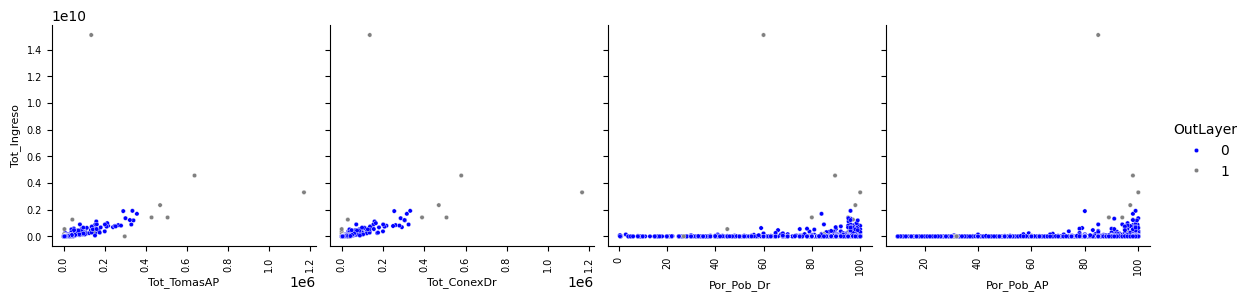

In [73]:
# @title
colors = ['blue', 'gray']

Col_Var_x1 = ['Tot_TomasAP', 'Tot_ConexDr', 'Por_Pob_Dr', 'Por_Pob_AP']
Col_Var_y = ['Tot_Ingreso']

# Crear el pairplot con una paleta de colores personalizada
g = sns.pairplot(df_ID_Outlayers,x_vars=Col_Var_x1,y_vars=Col_Var_y,height=3,hue='OutLayer',palette=colors,
    plot_kws={'s': 10})

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(axis='x', labelrotation=90, labelsize=7)
    ax.tick_params(axis='y', labelrotation=0, labelsize=7)

plt.show()


**Gráfica de dispersión de variables sin outlayers**

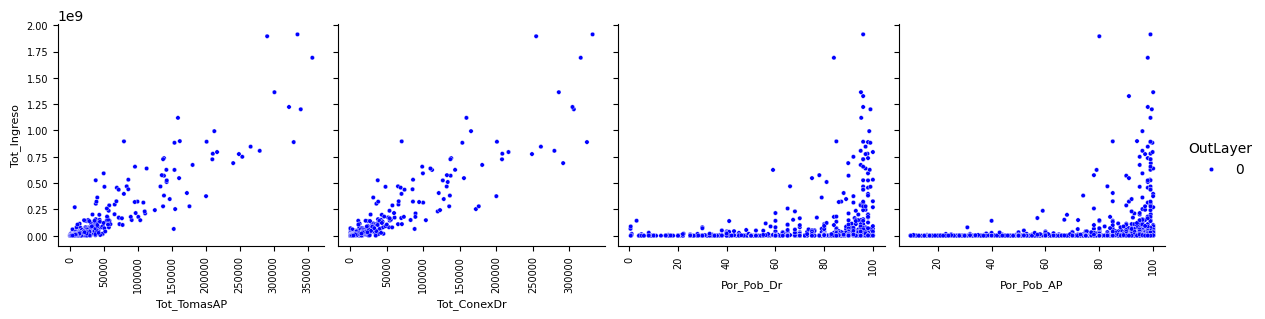

In [74]:
# @title
colors = ['blue', 'gray']

Col_Var_x1 = ['Tot_TomasAP', 'Tot_ConexDr', 'Por_Pob_Dr', 'Por_Pob_AP']
Col_Var_y = ['Tot_Ingreso']

# Crear el pairplot con una paleta de colores personalizada
g = sns.pairplot(df_Analisys1,x_vars=Col_Var_x1,y_vars=Col_Var_y,height=3,hue='OutLayer',palette=colors,
                 plot_kws={'s': 10}  # Cambiar el tamaño de los puntos
)

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(axis='x', labelrotation=90, labelsize=7)
    ax.tick_params(axis='y', labelrotation=0, labelsize=7)
plt.show()

**Histogramas variebles sin outlayers**

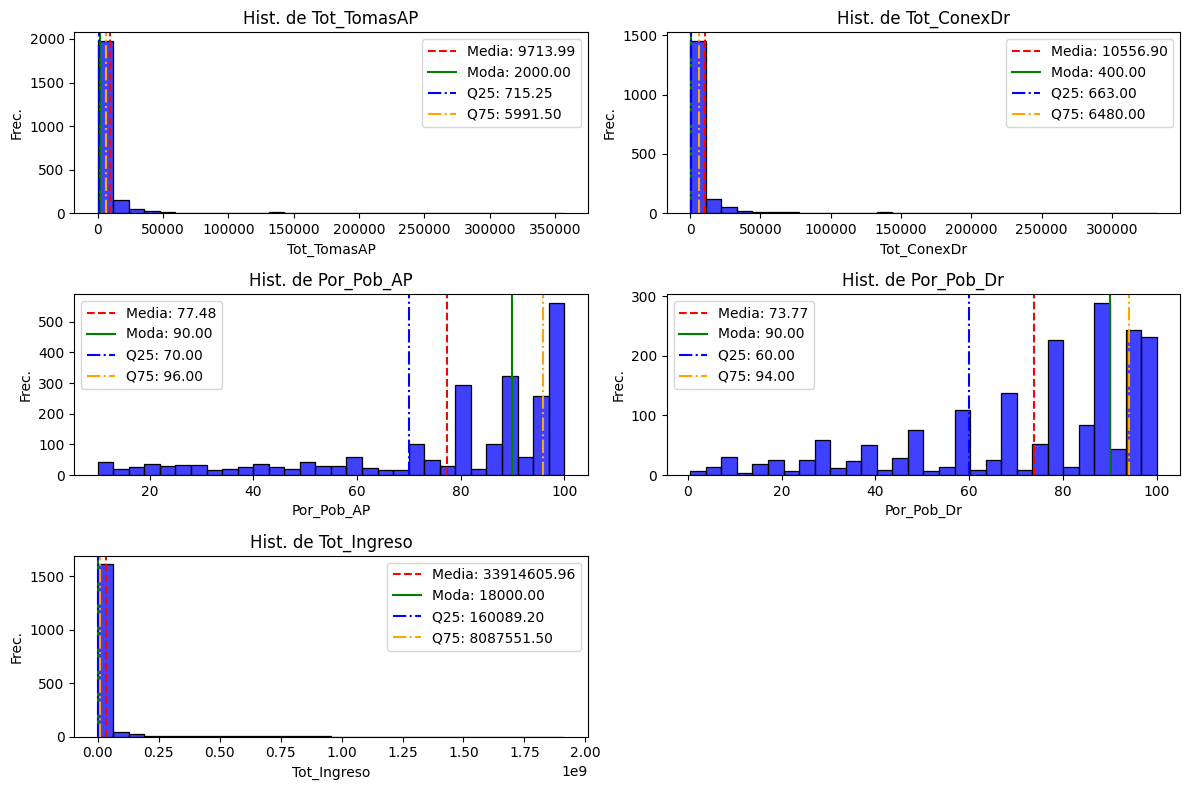

In [75]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

#Col_Var_x1 = ['Pob/Tomas', 'Pob/ConexDr', 'Ingreso/PobTot']
Col_Var_x1 = ['Tot_TomasAP', 'Tot_ConexDr', 'Por_Pob_AP', 'Por_Pob_Dr', 'Tot_Ingreso']

# Crear la figura y las subgráficas
plt.figure(figsize=(12, 8))

for col_x in Col_Var_x1:
    plt.subplot(3, 2, Col_Var_x1.index(col_x) + 1)  # Crear subgráficas en una cuadrícula 1x3

    # Graficar histograma
    sns.histplot(data=df_Analisys1, x=col_x, color='blue', bins=30, kde=False)

    # Calcular las estadísticas
    media = df_Analisys1[col_x].mean()
    moda = df_Analisys1[col_x].mode()[0]  # La moda puede devolver más de un valor, seleccionamos el primero
    cuartil_25 = df_Analisys1[col_x].quantile(0.25)
    cuartil_75 = df_Analisys1[col_x].quantile(0.75)

    # Agregar líneas verticales
    plt.axvline(media, color='r', linestyle='--', label=f'Media: {media:.2f}')
    plt.axvline(moda, color='g', linestyle='-', label=f'Moda: {moda:.2f}')
    plt.axvline(cuartil_25, color='b', linestyle='-.', label=f'Q25: {cuartil_25:.2f}')
    plt.axvline(cuartil_75, color='orange', linestyle='-.', label=f'Q75: {cuartil_75:.2f}')

    # Ajustar título y etiquetas
    plt.title(f'Hist. de {col_x}')
    plt.xlabel(col_x)
    plt.ylabel('Frec.')

    # Mostrar leyenda
    plt.legend()

# Ajustar el layout
plt.tight_layout()

# Mostrar las gráficas
plt.show()


**Estadísticos de datos sin outlayers**

In [76]:
df_Analisys1["OutLayer"]=df_Analisys1["OutLayer"].astype(str)
df_Analisys1.describe().T

,count,mean,std,min,25%,50%,75%,max
POBTOT,"2,432.0","47,012.2","125,822.8",130.0,"4,454.5","13,343.5","34,461.8","1,835,486.0"
Tot_TomasAP,"2,302.0","9,714.0","30,373.0",25.0,715.2,"2,038.5","5,991.5","356,964.0"
Tot_ConexDr,"1,733.0","10,556.9","32,175.9",3.0,663.0,"2,000.0","6,480.0","331,865.0"
Por_Pob_AP,"2,376.0",77.5,24.7,10.0,70.0,89.0,96.0,100.0
Por_Pob_Dr,"1,877.0",73.8,24.8,0.5,60.0,80.0,94.0,100.0
Tot_Ingreso,"1,748.0","33,914,606.0","143,589,018.7","1,000.0","160,089.2","1,273,142.5","8,087,551.5","1,913,074,129.0"
Pob/Tomas,"2,302.0",9.1,16.8,0.9,3.1,4.7,8.6,327.0
Pob/ConexDr,"1,733.0",30.0,132.8,1.0,3.8,6.1,13.2,"1,932.2"
Ingreso/PobTot,"1,748.0",252.2,388.2,0.3,23.7,98.0,321.2,"3,988.0"


### **2.7 Imputación de valores**

Los valores de la media y la moda son muy diferentes y en los histogramas se puede observar que el comportamiento de las variables no es normal, es por lo anterior que en este caso, la moda puede ser una mejor opción para imputar valores faltantes, aún y cuando no se trata de una variable categórica.

In [77]:
df_Analisys1["Tot_TomasAP"].fillna(df_Analisys1["Tot_TomasAP"].dropna().mode()[0],inplace=True)
df_Analisys1["Tot_ConexDr"].fillna(df_Analisys1["Tot_ConexDr"].dropna().mode()[0],inplace=True)
df_Analisys1["Por_Pob_AP"].fillna(df_Analisys1["Por_Pob_AP"].dropna().mode()[0],inplace=True)
df_Analisys1["Por_Pob_Dr"].fillna(df_Analisys1["Por_Pob_Dr"].dropna().mode()[0] ,inplace=True)
df_Analisys1["Tot_Ingreso"].fillna(df_Analisys1["Tot_Ingreso"].dropna().mode()[0] ,inplace=True)

In [78]:
df_Analisys1.describe().T

,count,mean,std,min,25%,50%,75%,max
POBTOT,"2,432.0","47,012.2","125,822.8",130.0,"4,454.5","13,343.5","34,461.8","1,835,486.0"
Tot_TomasAP,"2,432.0","9,301.7","29,600.7",25.0,765.0,"2,000.0","5,430.5","356,964.0"
Tot_ConexDr,"2,432.0","7,637.6","27,545.3",3.0,400.0,850.0,"3,875.5","331,865.0"
Por_Pob_AP,"2,432.0",77.8,24.5,10.0,70.0,90.0,95.0,100.0
Por_Pob_Dr,"2,432.0",77.5,22.9,0.5,70.0,90.0,90.0,100.0
Tot_Ingreso,"2,432.0","24,381,185.5","122,674,459.3","1,000.0","18,000.0","258,511.5","3,795,006.9","1,913,074,129.0"
Pob/Tomas,"2,302.0",9.1,16.8,0.9,3.1,4.7,8.6,327.0
Pob/ConexDr,"1,733.0",30.0,132.8,1.0,3.8,6.1,13.2,"1,932.2"
Ingreso/PobTot,"1,748.0",252.2,388.2,0.3,23.7,98.0,321.2,"3,988.0"


*  **Visualización de datos (datos Imputados)**

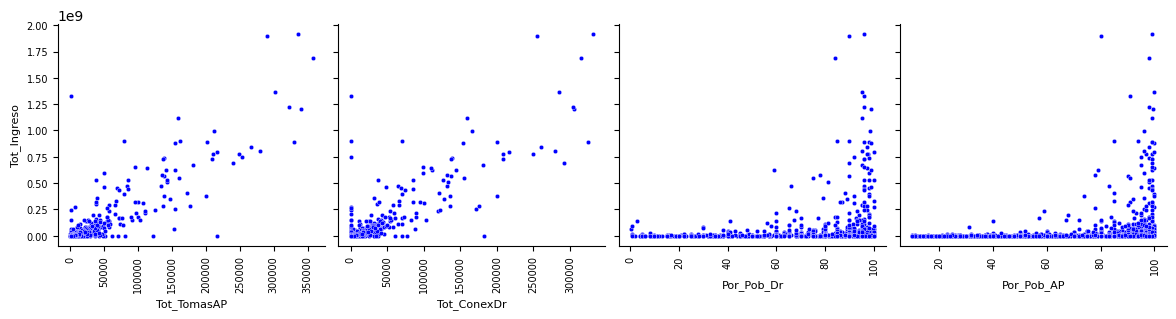

In [ ]:
# @title
colors = ['blue']

Col_Var_x1 = ['Tot_TomasAP', 'Tot_ConexDr', 'Por_Pob_Dr', 'Por_Pob_AP']
Col_Var_y = ['Tot_Ingreso']

# Crear el pairplot con una paleta de colores personalizada
g = sns.pairplot(df_Analisys1,x_vars=Col_Var_x1,y_vars=Col_Var_y,height=3,
                 plot_kws={'s': 10, 'color':colors}  # Cambiar el tamaño de los puntos
)

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(axis='x', labelrotation=90, labelsize=7)
    ax.tick_params(axis='y', labelrotation=0, labelsize=7)
plt.show()

# **3. Pre procesamiento**  
_____

## **3.1 Estandarización**

En esta etapa se realiza el preprocesamiento de datos antes de aplicar el algoritmo KMeans, para garantizar que las variables utilizadas estén correctamente escaladas y listas para ser segmentadas. Para la estandarización se utiliza StandardScaler para transformar todas las variables para que tengan una media de 0 y una desviación estándar de 1.

Estandarización de las variables:
'POBTOT','Tot_TomasAP', 'Tot_ConexDr', 'Por_Pob_AP', 'Por_Pob_Dr', 'Tot_Ingreso'

In [83]:
df_Analisys1.sample(2)

,folio,ENTIDAD,NOM_ENT,MUN,NOM_MUN,POBTOT,Tot_TomasAP,Tot_ConexDr,Por_Pob_AP,Por_Pob_Dr,Tot_Ingreso,Pob/Tomas,Pob/ConexDr,Ingreso/PobTot,OutLayer
791,16003,16,Michoacán de Ocampo,3,Álvaro Obregón,23000,"2,792.0","2,784.0",92.0,92.0,"3,243,516.0",8.2,8.3,141.0,0
998,19041,19,Nuevo León,41,Pesquería,147624,"39,083.0","38,301.0",99.0,96.0,"323,543,747.9",3.8,3.9,"2,191.7",0


In [84]:
df_clasif = df_Analisys1.iloc[:, [5,6,7,8,9,10]].copy()
SSscaler = StandardScaler()
X_scaled= SSscaler.fit_transform(df_clasif)
print(X_scaled.shape)

(2432, 6)


# **4. Modelos de clasificación**  
_____

En este proyecto se utilizan dos algoritmos de segmentación que son:

**Segmentación con KMeans:**
El algoritmo KMeans agrupa observaciones en un número fijo de clústeres basado en características similares, minimizando la distancia al centroide. Se implementa usando la librería KMeans de scikit-learn, y también se evaluó con la métrica Silhouette Score.

**Segmentación con Hierarchical Clustering:**  
El algoritmo de agrupamiento jerárquico busca crear una jerarquía de observaciones, se utiliza la librería hierarchy de SciPy y se evalúa con la métrica Silhouette Score.

El algoritmo que tenga un mejor rendimiento es el que se utilizará para la segmentación final.

### **4.2 Segmentación con KMeans y  Hierarchical**

In [85]:
##### Aplicar K-Means
kmeans = KMeans(n_clusters=5, random_state=42,n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette:.2f}')

K-Means Silhouette Score: 0.49


In [86]:
################################################################# Aplicar Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(X_scaled)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.2f}')

Hierarchical Clustering Silhouette Score: 0.40


#### **4.2.1 KMeans y hierarchical Selección número cluster**

Clusters: 2, Silhouette Score: 0.83
Clusters: 3, Silhouette Score: 0.36
Clusters: 4, Silhouette Score: 0.41
Clusters: 5, Silhouette Score: 0.40
Clusters: 6, Silhouette Score: 0.40
Clusters: 7, Silhouette Score: 0.41
Clusters: 8, Silhouette Score: 0.42

Mejor número de clusters: 2, con Silhouette Score: 0.83


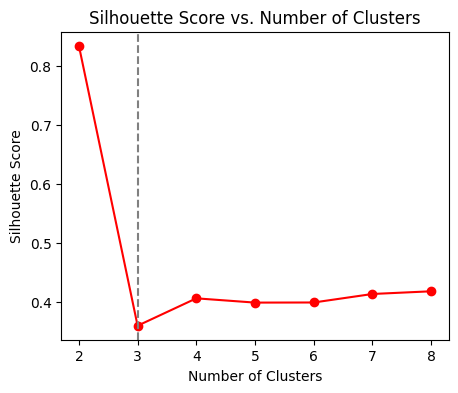

In [ ]:
# @title
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Rango de clusters para probar
num_clusters = [2, 3, 4, 5,6,7,8]
best_score = -1
best_k = None
silhouette_scores = []

# Evaluar cada número de clusters
for k in num_clusters:
    hierarchical = AgglomerativeClustering(n_clusters=k)
    labels = hierarchical.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f'Clusters: {k}, Silhouette Score: {score:.2f}')

    if score > best_score:
        best_score = score
        best_k = k

print(f'\nMejor número de clusters: {best_k}, con Silhouette Score: {best_score:.2f}')

# Graficar el puntaje de silueta
plt.figure(figsize=(5, 4))
plt.plot(num_clusters, silhouette_scores, marker='o',color='red')
plt.axvline(x=3,linestyle='dashed',color='gray')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.xticks(num_clusters)
#plt.grid(True)
plt.show()


Score silueta 0.4861673398110709


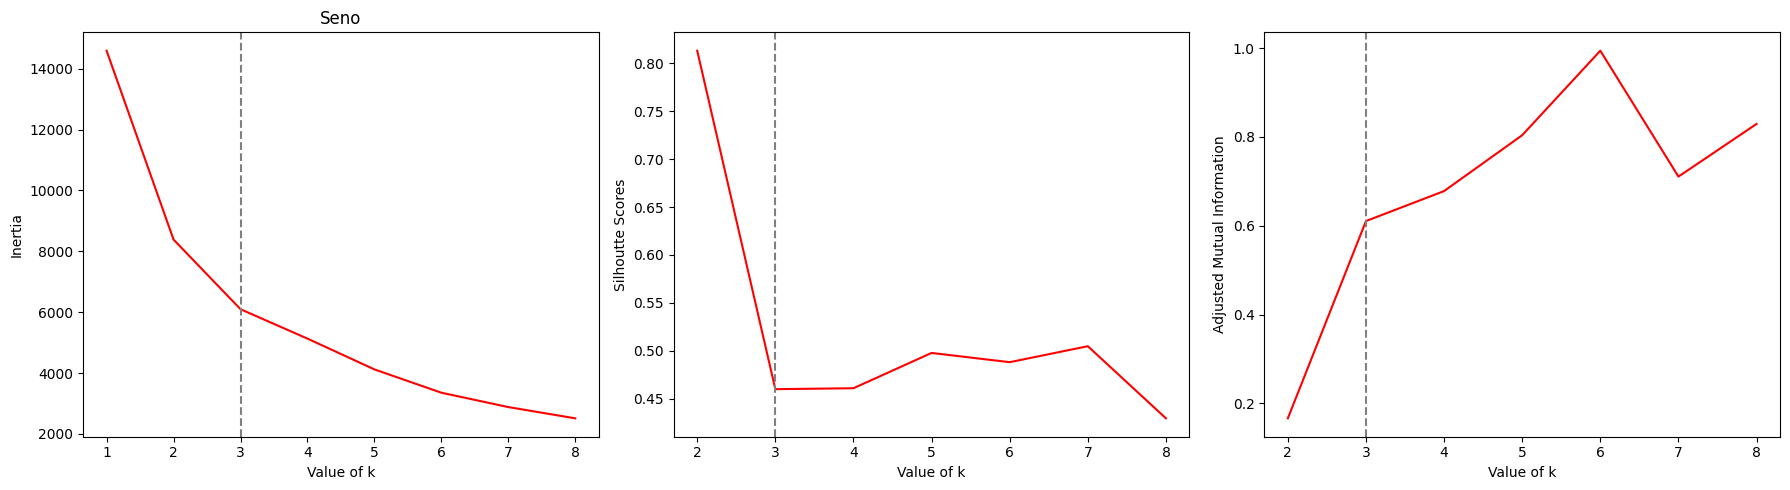

In [ ]:
# @title
# Crear una figura y tres subplots en un renglón
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

y_clusters=kmeans.predict(X_scaled)
################################################### Gráfico 1
from sklearn.metrics import silhouette_score
max_num_clusters = 9
inertias = []
k_values = list(range(1,max_num_clusters))
for k in k_values:
    modelo = KMeans(n_clusters=k, n_init='auto')
    modelo.fit(X_scaled)
    inertias.append(modelo.inertia_)

axs[0].plot(k_values,inertias,color='red')
axs[0].axvline(x=3,linestyle='dashed',color='gray')
axs[0].set_title('Seno')
axs[0].set_xlabel("Value of k", fontsize=10)
axs[0].set_ylabel("Inertia", fontsize=10)
axs[0].set_xticks(k_values)

################################################### Gráfico 2
from sklearn.metrics import silhouette_score
max_num_clusters = 9

print("Score silueta",silhouette_score(X_scaled, y_clusters))

siluetas = []
k_values = list(range(2,max_num_clusters))
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto').fit(X_scaled)
    labels = kmeans.labels_
    siluetas.append(silhouette_score(X_scaled, labels, metric='euclidean'))

axs[1].plot(k_values,siluetas,color='red')
axs[1].axvline(x=3,linestyle='dashed',color='gray')
axs[1].set_xticks(k_values)
axs[1].set_ylabel("Silhoutte Scores", fontsize=10)
axs[1].set_xlabel("Value of k", fontsize=10)

################################################### Gráfico 3
from sklearn.metrics import adjusted_mutual_info_score
max_num_clusters = 9
scores = []
k_values = list(range(2,max_num_clusters))
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    scores.append(adjusted_mutual_info_score(y_clusters, labels))

axs[2].plot(k_values,scores,color='red')
axs[2].axvline(x=3,linestyle='dashed',color='gray')
axs[2].set_xticks(k_values)
axs[2].set_ylabel("Adjusted Mutual Information", fontsize=10)
axs[2].set_xlabel("Value of k", fontsize=10)

plt.tight_layout()
plt.show()


### **4.3 Clasificación conKMeans**

Debido a que el resultado de Silhouette Score es más alto para K-Means comparado contra Hierarchical Clustering (0.49 frente a 0.40), este método es preferible para la segmentación en el análisis, ya que sugiere que produce clústeres más claros y separados.

In [87]:
################################################################# Aplicar K-Means
kmeans = KMeans(n_clusters=5, random_state=42,n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette:.2f}')

df_clasif["cluster_Kmean"]=kmeans_labels

df_clasif["folio"] = df_Analisys1["folio"]
df_clasif.sample(4)

K-Means Silhouette Score: 0.49


,POBTOT,Tot_TomasAP,Tot_ConexDr,Por_Pob_AP,Por_Pob_Dr,Tot_Ingreso,cluster_Kmean,folio
411,126001,"31,217.0","31,529.0",87.0,56.0,"117,151,638.1",0,12038
1037,4215,280.0,400.0,60.0,90.0,"18,000.0",4,20029
1871,9277,615.0,400.0,80.0,90.0,"18,000.0",0,24047
1393,100402,"2,897.0","1,950.0",80.0,75.0,"1,801,670.1",0,20385


In [88]:
df_clasif["cluster_Kmean"].value_counts()

,count
cluster_Kmean,
0,1555
3,456
4,343
2,61
1,17


# **5. Resultados Segmentación OAPAS**  
_____

La segmentación ha generado un total de cinco clústeres, con el clúster 0 siendo el más numeroso con 1555 folios (63.8%). El clúster 1 es el más pequeño con solo 17 folios (0.7%). El análisis muestra que los 2432 fólios se agrupan de la siguiente forma:

Clúster 0: 1555 folios, representando el 63.8% del total.
Clúster 1: 17 folios, que constituye solo el 0.7% del total.
Clúster 2: 61 folios, equivalente al 2.5% del total.
Clúster 3: 456 folios, lo que representa el 18.7% del total.
Clúster 4: 343 folios, que corresponde al 14% del total.



## **5.1 Número de clases y visualización**  


In [89]:
df_clasif.groupby("cluster_Kmean")["Tot_Ingreso"].mean().sort_values(ascending=False)

,Tot_Ingreso
cluster_Kmean,
1,"1,094,301,596.4"
2,"388,209,972.6"
0,"9,395,246.6"
3,"3,683,562.1"
4,"2,104,358.5"


In [90]:
df_clasif["cluster_Kmean"] = df_clasif["cluster_Kmean"].replace({1:"Clase 5",   # Muy alta cobertura de agua pot. y alcantarillado "
                                                                 2:"Clase 4",   # Alta cobertura de agua pot. y alcantarillado "
                                                                 0:"Clase 3",   # Media cobertura de agua pot. y alcantarillado "
                                                                 3:"Clase 2",   # Baja cobertura de agua pot. y alcantarillado "
                                                                 4:"Clase 1"})  # Muy baja cobertura de agua pot. y alcantarillado ",})

df_clasif["cluster_Kmean"].value_counts()


,count
cluster_Kmean,
Clase 3,1555
Clase 2,456
Clase 1,343
Clase 4,61
Clase 5,17


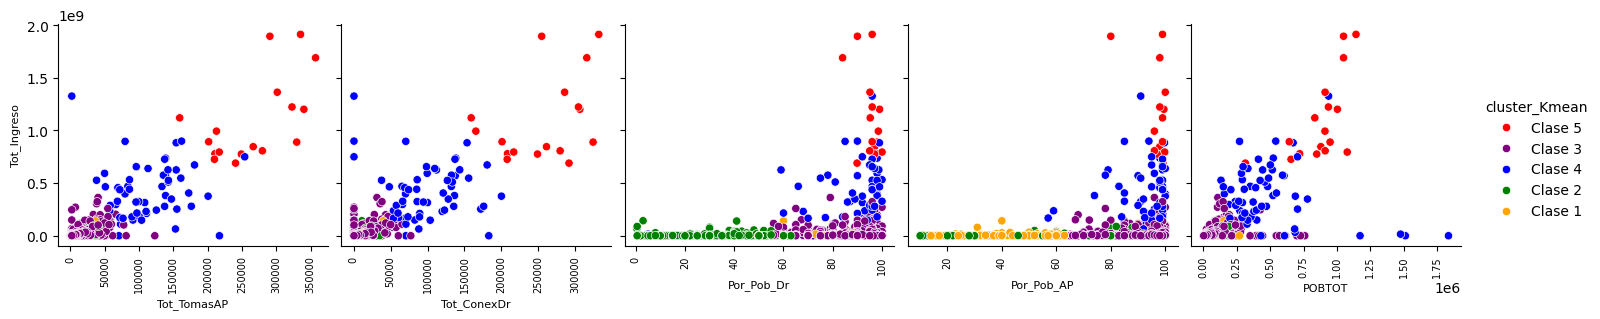

In [91]:
# @title
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
colors = {
    'Clase 1': 'orange',
    'Clase 2': 'green',
    'Clase 4': 'blue',
    'Clase 5': 'red',
    'Clase 3': 'purple'  # Asegúrate de que este nombre coincida con tus datos
}

Col_Var_x1 =['Tot_TomasAP', 'Tot_ConexDr', 'Por_Pob_Dr', 'Por_Pob_AP','POBTOT']
Col_Var_y = ['Tot_Ingreso']

# Crear el pairplot con una paleta de colores personalizada
g = sns.pairplot(df_clasif,x_vars=Col_Var_x1,y_vars=Col_Var_y,height=3,hue='cluster_Kmean',
    palette=colors
)

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(axis='x', labelrotation=90, labelsize=7)

plt.show()

In [92]:
df_OAPAS=df_ID_Outlayers.merge(df_clasif, on='folio', how='left',suffixes=('', '_impt'))

List_Col_Elim=['POBTOT_impt', 'Tot_TomasAP_impt', 'Tot_ConexDr_impt', 'Por_Pob_AP_impt', 'Por_Pob_Dr_impt', 'Tot_Ingreso_impt']
df_OAPAS.drop(columns=List_Col_Elim,inplace=True)

In [93]:
df_OAPAS = df_OAPAS[df_OAPAS['folio'] != "15039"]   # Elimina dato atípico 15039 Ixtapaluca
df_OAPAS.shape

(2468, 16)

In [94]:
List_OutLayersMG=['21114', '14039', '6010', '11020', '15039', '2004']

In [95]:
df_OAPAS.loc[df_OAPAS['folio'].isin(List_OutLayersMG), 'cluster_Kmean'] = "Clase MG"    #  Genera "Clase MG"
df_OAPAS.loc[df_OAPAS['cluster_Kmean'].isnull(), 'cluster_Kmean'] = 'OutLayers'  #  Genera OutLayers

In [96]:
print("df_OAPAS con OutLayers",df_OAPAS.shape)
df_OAPAS = df_OAPAS[df_OAPAS['cluster_Kmean'] != 'OutLayers']

df_OAPAS_MG=df_OAPAS.copy()
df_OAPAS = df_OAPAS[df_OAPAS['cluster_Kmean'] != 'Clase MG']

print("df_OAPAS SIN Clase MG",df_OAPAS.shape)
print("df_OAPAS_MG CON Clase MG",df_OAPAS_MG.shape)


df_OAPAS con OutLayers (2468, 16)
df_OAPAS SIN Clase MG (2432, 16)
df_OAPAS_MG CON Clase MG (2437, 16)


In [97]:
df_OAPAS.to_excel("df_OAPAS.xlsx",index=False)    #Exporta el df_final a Excel

*  **Box Plot de los 5 cluster para Tomas de Agua y Conexiones de drenaje, %Po, servidia de agua potable y drenaje, así como Ingreso y Población**

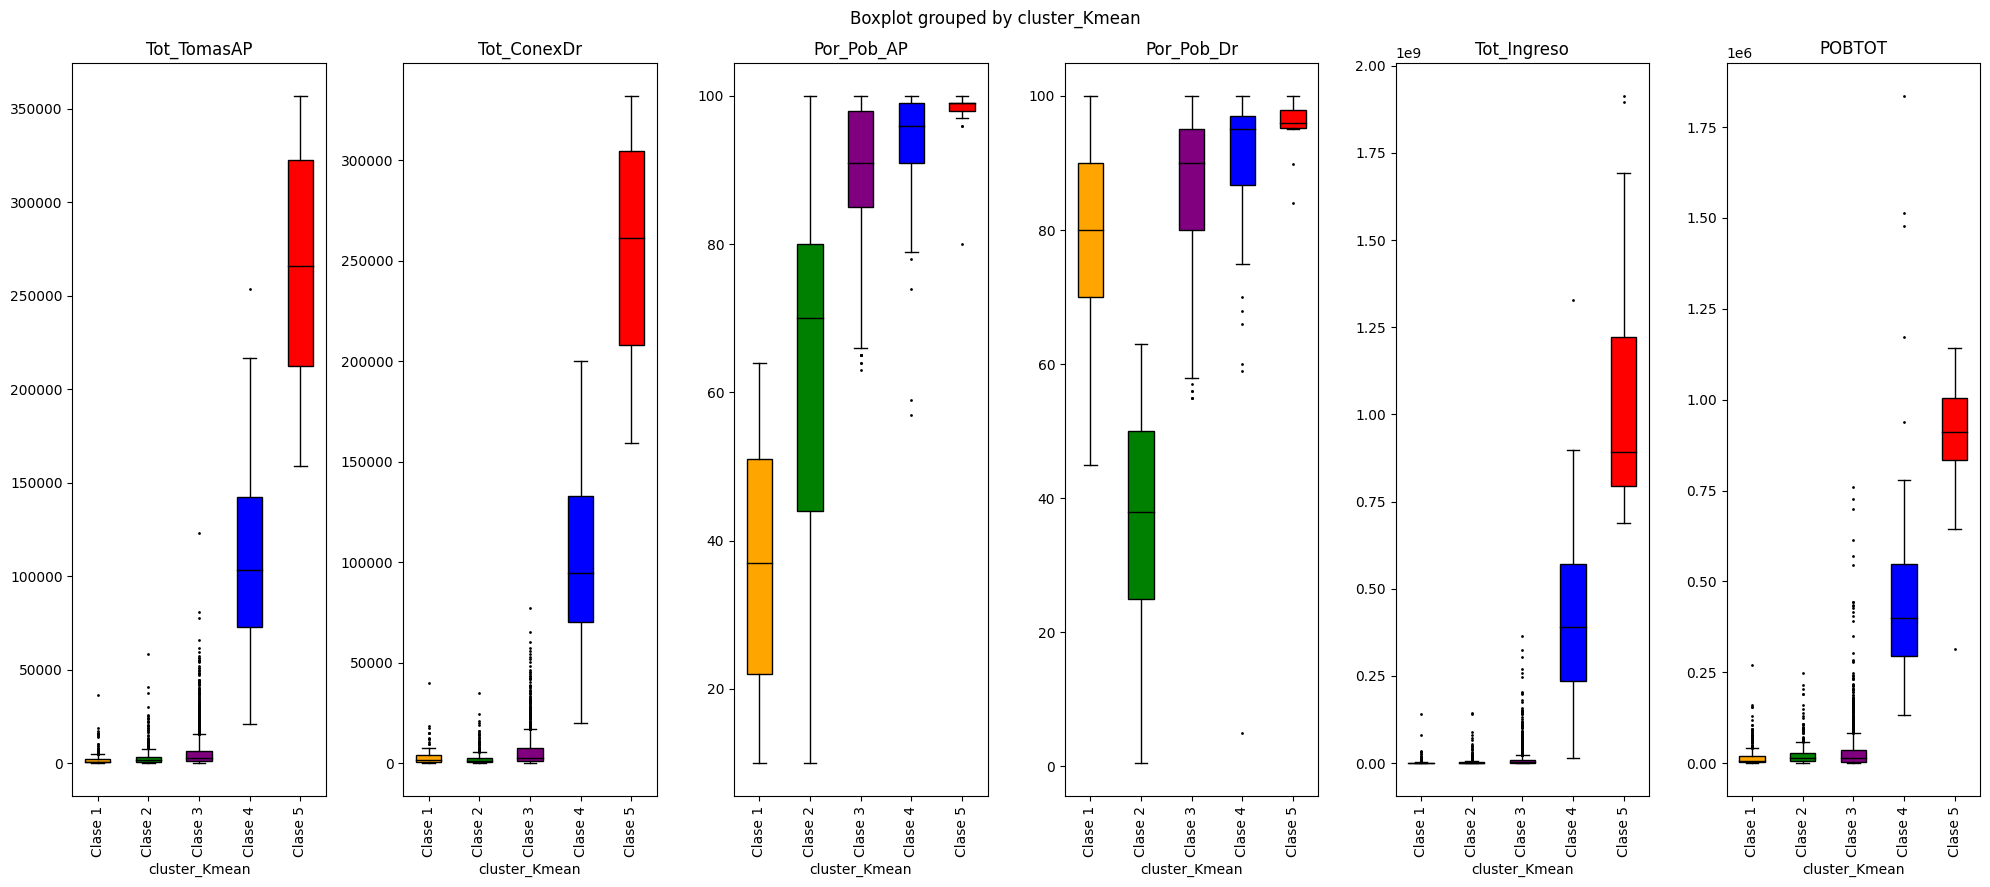

In [98]:
# @title
fig, axes = plt.subplots(1, 6, figsize=(20, 9), sharey=False)

# Colores para cada clase
colors = {
    'Clase 1': 'orange',
    'Clase 2': 'green',
    'Clase 4': 'blue',
    'Clase 5': 'red',
    'Clase 3': 'purple'
}

# Iterar sobre las variables y crear los boxplots para cada una
variables = ['Tot_TomasAP', 'Tot_ConexDr', 'Por_Pob_AP', 'Por_Pob_Dr',  'Tot_Ingreso', 'POBTOT']
for i, var in enumerate(variables):
    box = df_OAPAS.boxplot(
        column=var,
        by='cluster_Kmean',
        ax=axes[i],
        patch_artist=True,
        flierprops=dict(marker='o', color='gray', markersize=1)
    )

    # Configuraciones de color para cada clase
    for j, patch in enumerate(box.patches):
        cluster_label = box.get_xaxis().get_ticklabels()[j].get_text()
        patch.set_facecolor(colors.get(cluster_label, 'lightgray'))
        patch.set_edgecolor('black')  # Color del borde de la caja
        for line in box.lines:
            line.set_color('black')  # Color negro a todas las líneas

    for line in box.lines[4::6]:  # Líneas de mediana a negro
        line.set_color('black')

#    axes[i].set_title(var)  # Título del gráfico
    #axes[i].set_xlabel('cluster_Kmean', rotation=90)
#    axes[i].set_ylabel(var)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].grid(False)

plt.tight_layout()
plt.show()


*  **Box Plot de los 6 cluster para Tomas de Agua y Conexiones de drenaje, %Po, servidia de agua potable y drenaje, así como Ingreso y Población (incluye Mega Ciudades**

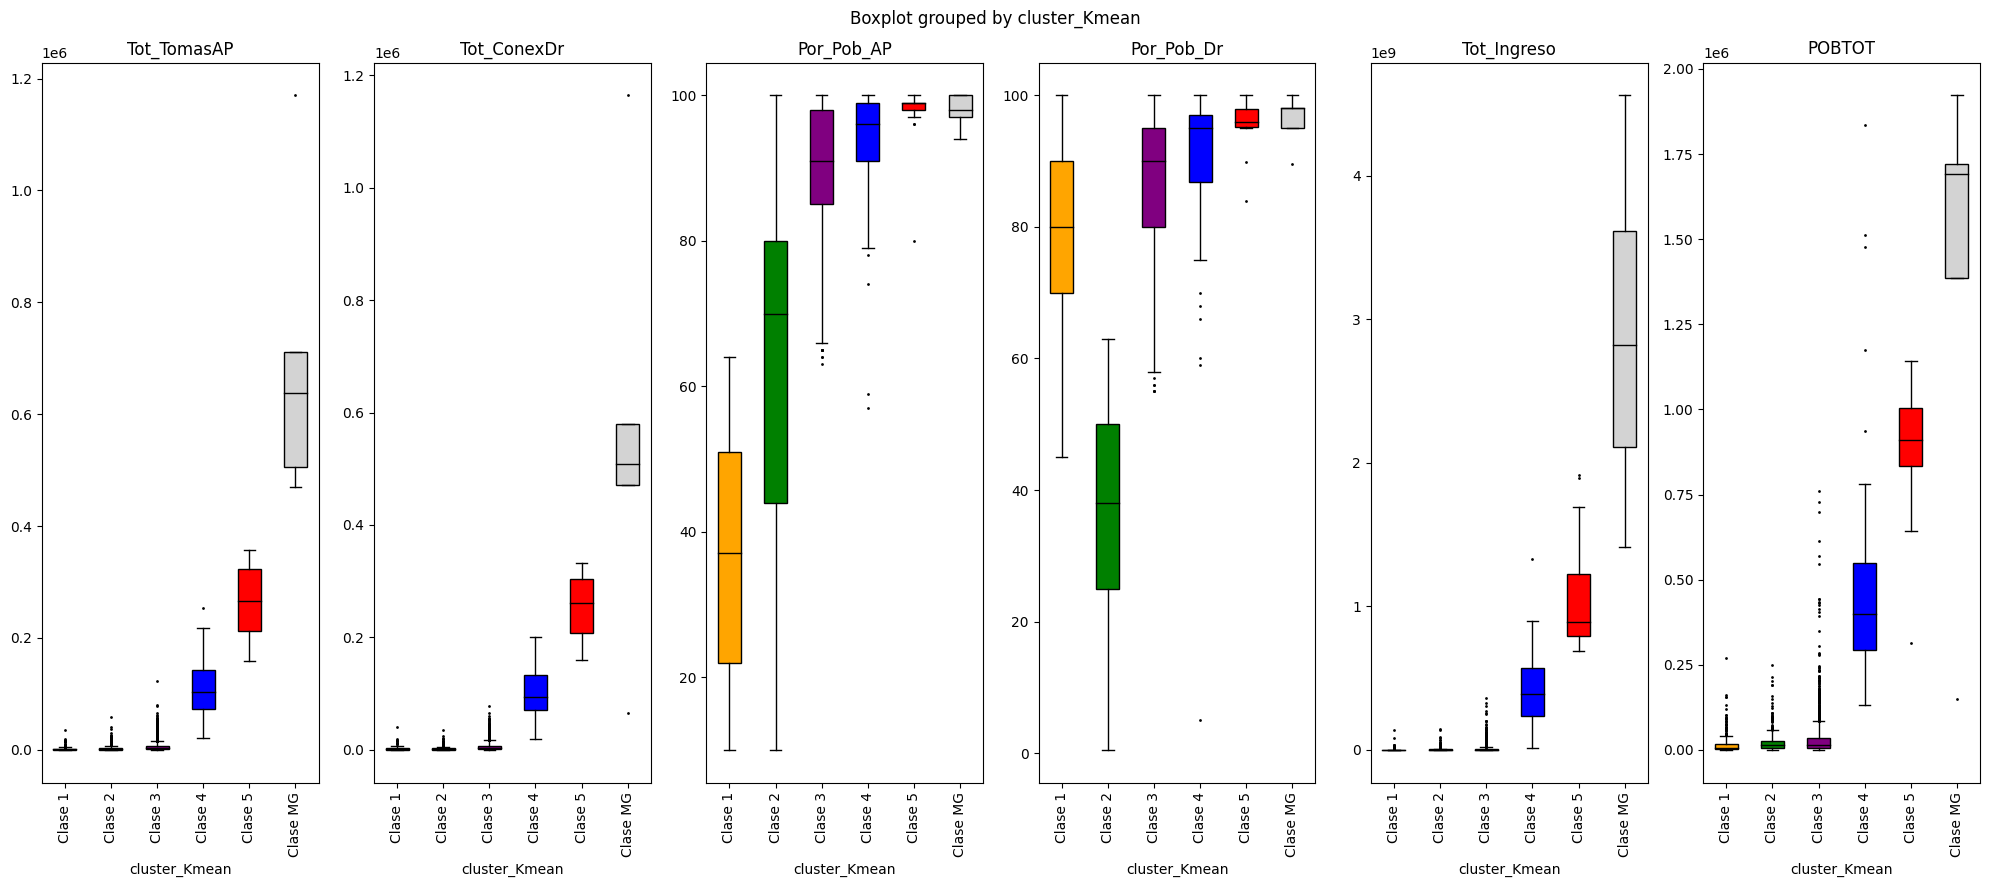

In [100]:
# @title
fig, axes = plt.subplots(1, 6, figsize=(20, 9), sharey=False)

# Colores para cada clase
colors = {
    'Clase 1': 'orange',
    'Clase 2': 'green',
    'Clase 4': 'blue',
    'Clase 5': 'red',
    'Clase 3': 'purple'
}

# Iterar sobre las variables y crear los boxplots para cada una
variables = ['Tot_TomasAP', 'Tot_ConexDr', 'Por_Pob_AP', 'Por_Pob_Dr',  'Tot_Ingreso', 'POBTOT']
for i, var in enumerate(variables):
    box = df_OAPAS_MG.boxplot(
        column=var,
        by='cluster_Kmean',
        ax=axes[i],
        patch_artist=True,
        flierprops=dict(marker='o', color='gray', markersize=1)
    )

    # Configuraciones de color para cada clase
    for j, patch in enumerate(box.patches):
        cluster_label = box.get_xaxis().get_ticklabels()[j].get_text()
        patch.set_facecolor(colors.get(cluster_label, 'lightgray'))
        patch.set_edgecolor('black')  # Color del borde de la caja
        for line in box.lines:
            line.set_color('black')  # Color negro a todas las líneas

    for line in box.lines[4::6]:  # Líneas de mediana a negro
        line.set_color('black')
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].grid(False)

plt.tight_layout()
plt.show()


## **5.2 Caracterización de los Clusters**

### **5.2.1 Cluster Clase MG. Muy alta cobertura de agua pot. y alcantarillado**

In [101]:
df_clasif_MG = df_OAPAS_MG[df_OAPAS_MG['cluster_Kmean'] == "Clase MG"]
df_clasif_MG.describe().T

,count,mean,std,min,25%,50%,75%,max
POBTOT,5.0,"1,374,262.0","710,909.4","149,762.0","1,385,629.0","1,692,181.0","1,721,215.0","1,922,523.0"
Tot_TomasAP,5.0,"698,904.4","280,861.8","469,797.0","506,375.0","637,449.0","710,766.0","1,170,135.0"
Tot_ConexDr,5.0,"557,352.2","393,958.3","65,505.0","470,367.0","507,618.0","578,966.0","1,164,305.0"
Por_Pob_AP,5.0,97.8,2.5,94.0,97.0,98.0,100.0,100.0
Por_Pob_Dr,5.0,96.1,4.1,89.6,95.0,98.0,98.0,100.0
Tot_Ingreso,4.0,"2,904,362,967.0","1,344,935,990.6","1,416,260,601.1","2,110,720,138.3","2,820,748,354.9","3,614,391,183.5","4,559,694,557.0"
Pob/Tomas,5.0,2.3,1.5,0.2,1.2,3.0,3.3,3.7
Pob/ConexDr,5.0,2.8,1.0,1.2,2.3,3.3,3.3,3.7
Ingreso/PobTot,4.0,"1,737.6",768.0,836.9,"1,229.8","1,866.3","2,374.1","2,381.1"
OutLayer,5.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


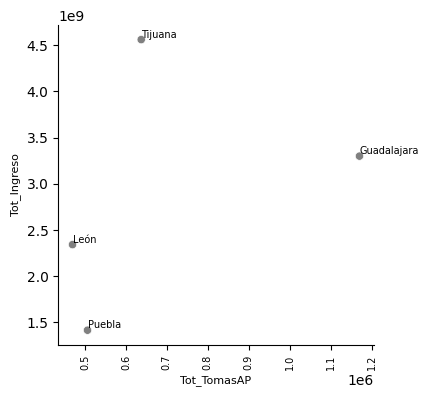

In [ ]:
# @title
colors = ['gray']
Col_Var_y=["Tot_Ingreso"]
Col_Var_x1=["Tot_TomasAP"]

g = sns.pairplot(
    df_clasif_MG,
    x_vars=Col_Var_x1,
    y_vars=Col_Var_y,
    height=4,
    hue='cluster_Kmean',
    palette=colors
)
g._legend.remove()
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(axis='x', labelrotation=90, labelsize=7)


# Identificar los 20 valores más altos en 'Tot_Ingreso'
top_20_indices = df_clasif_MG['Tot_Ingreso'].nlargest(5).index

# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'Tot_Ingreso'
        for idx in top_20_indices:
            row = df_clasif_MG.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['NOM_MUN'],
                fontsize=7,
                ha='left',
                va='bottom'
            )

# Mostrar la gráfica
plt.show()

plt.show()

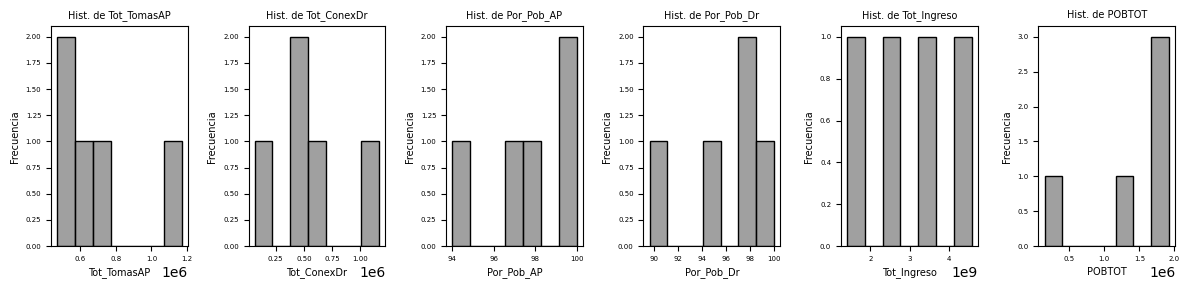

In [111]:
# @title
colors = ['gray']  #['red', 'blue', 'green', 'purple', 'orange']
variables = ['Tot_TomasAP', 'Tot_ConexDr', 'Por_Pob_AP','Por_Pob_Dr', 'Tot_Ingreso','POBTOT']
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(12, 3))
axes = axes.flatten()
for i, var in enumerate(variables):
    sns.histplot(df_clasif_MG [var], ax=axes[i], color=colors[0],bins=7)
    axes[i].set_title(f'Hist. de {var}', fontsize=7)
    axes[i].set_xlabel(var, fontsize=7)
    axes[i].set_ylabel('Frecuencia', fontsize=7)
    axes[i].tick_params(axis='x', labelsize=5)
    axes[i].tick_params(axis='y', labelsize=5)

plt.tight_layout()
plt.show()

### **5.2.2 Cluster Clase 5. Muy alta cobertura de agua pot. y alcantarillado**


In [112]:
df_clasif_5 = df_OAPAS_MG[df_OAPAS_MG['cluster_Kmean'] == "Clase 5"]
df_clasif_5.describe().T

,count,mean,std,min,25%,50%,75%,max
POBTOT,17.0,"872,988.5","200,845.3","314,331.0","834,434.0","911,503.0","1,003,530.0","1,142,994.0"
Tot_TomasAP,17.0,"265,927.1","59,093.7","159,115.0","212,640.0","266,156.0","322,638.0","356,964.0"
Tot_ConexDr,17.0,"256,557.1","54,971.4","159,115.0","208,214.0","261,084.0","304,325.0","331,865.0"
Por_Pob_AP,17.0,97.4,4.6,80.0,98.0,99.0,99.0,100.0
Por_Pob_Dr,16.0,95.7,3.9,84.0,95.2,96.0,97.8,100.0
Tot_Ingreso,17.0,"1,094,301,596.4","402,681,983.8","689,929,731.8","795,183,597.0","893,093,811.4","1,223,248,221.1","1,913,074,129.0"
Pob/Tomas,17.0,3.4,0.9,1.3,3.0,3.3,3.4,5.2
Pob/ConexDr,17.0,3.5,1.0,1.1,3.2,3.3,3.5,5.5
Ingreso/PobTot,17.0,"1,278.2",383.7,738.2,961.5,"1,197.2","1,496.1","2,194.9"
OutLayer,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


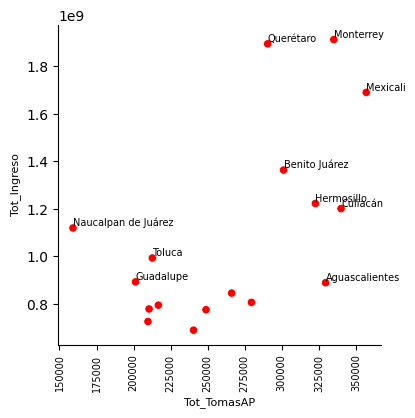

In [113]:
# @title
colors = ['red']
Col_Var_y=["Tot_Ingreso"]
Col_Var_x1=["Tot_TomasAP"]


g = sns.pairplot(
    df_clasif_5,
    x_vars=Col_Var_x1,
    y_vars=Col_Var_y,
    height=4,
    hue='cluster_Kmean',
    palette=colors
)
g._legend.remove()
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(axis='x', labelrotation=90, labelsize=7)

# Identificar los 20 valores más altos en 'Tot_Ingreso'
top_20_indices = df_clasif_5['Tot_Ingreso'].nlargest(10).index

# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        for idx in top_20_indices:
            row = df_clasif_5.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['NOM_MUN'],
                fontsize=7,
                ha='left',
                va='bottom'
            )

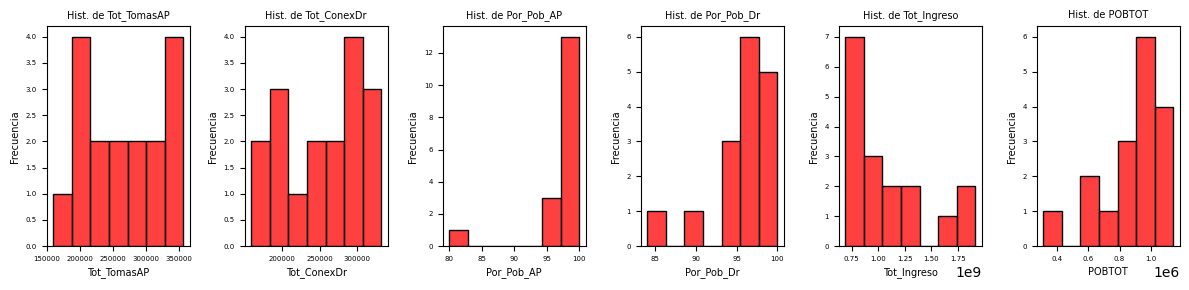

In [114]:
# @title
colors = ['red']  #['red', 'blue', 'green', 'purple', 'orange']
variables = ['Tot_TomasAP', 'Tot_ConexDr', 'Por_Pob_AP','Por_Pob_Dr', 'Tot_Ingreso','POBTOT']
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(12, 3))
axes = axes.flatten()
for i, var in enumerate(variables):
    sns.histplot(df_clasif_5 [var], ax=axes[i], color=colors[0],bins=7)
    axes[i].set_title(f'Hist. de {var}', fontsize=7)
    axes[i].set_xlabel(var, fontsize=7)
    axes[i].set_ylabel('Frecuencia', fontsize=7)
    axes[i].tick_params(axis='x', labelsize=5)
    axes[i].tick_params(axis='y', labelsize=5)

plt.tight_layout()
plt.show()

### **5.2.3 Cluster Clase 4. Alta cobertura de agua pot. y alcantarillado**

In [115]:
df_clasif_4 = df_OAPAS_MG [df_OAPAS_MG['cluster_Kmean'] == "Clase 4"]
df_clasif_4.describe().T

,count,mean,std,min,25%,50%,75%,max
POBTOT,61.0,"489,266.0","323,809.2","132,169.0","293,444.0","400,057.0","547,503.0","1,835,486.0"
Tot_TomasAP,57.0,"111,626.6","47,958.6","21,209.0","73,005.0","103,605.0","142,394.0","253,819.0"
Tot_ConexDr,55.0,"101,299.8","41,971.2","20,109.0","70,039.5","94,363.0","132,968.0","200,040.0"
Por_Pob_AP,61.0,93.0,8.9,57.0,91.0,96.0,99.0,100.0
Por_Pob_Dr,60.0,89.0,14.9,5.0,86.8,95.0,97.0,100.0
Tot_Ingreso,56.0,"422,869,970.2","252,793,282.0","15,228,020.6","235,704,102.6","389,785,944.8","571,617,683.0","1,326,602,408.5"
Pob/Tomas,57.0,5.3,9.5,2.0,3.0,3.4,4.4,69.6
Pob/ConexDr,55.0,5.7,10.1,2.2,3.2,3.7,4.5,73.4
Ingreso/PobTot,56.0,"1,163.3",789.6,10.3,609.0,"1,070.8","1,410.7","3,988.0"
OutLayer,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


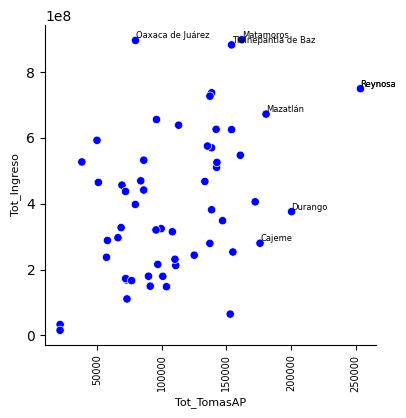

In [116]:
# @title
colors = ['blue']
Col_Var_y=["Tot_Ingreso"]
Col_Var_x1=["Tot_TomasAP"]

g = sns.pairplot(
    df_clasif_4,
    x_vars=Col_Var_x1,
    y_vars=Col_Var_y,
    height=4,
    hue='cluster_Kmean',
    palette=colors
)
g._legend.remove()
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(axis='x', labelrotation=90, labelsize=7)


top_20_indices = df_clasif_4['Tot_Ingreso'].nlargest(5).index

# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'Tot_Ingreso'
        for idx in top_20_indices:
            row = df_clasif_4.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['NOM_MUN'],
                fontsize=6,
                ha='left',
                va='bottom'
            )


top_20_indices2 = df_clasif_4['Tot_TomasAP'].nlargest(5).index

# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'Tot_Ingreso'
        for idx in top_20_indices2:
            row = df_clasif_4.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['NOM_MUN'],
                fontsize=6,
                ha='left',
                va='bottom'
            )



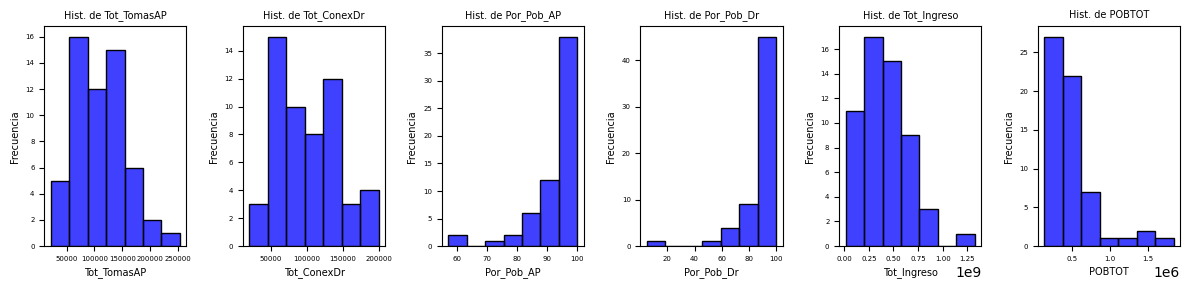

In [118]:
# @title
colors = ['blue']
variables = ['Tot_TomasAP', 'Tot_ConexDr', 'Por_Pob_AP','Por_Pob_Dr', 'Tot_Ingreso','POBTOT']
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(12, 3))
axes = axes.flatten()
for i, var in enumerate(variables):
    sns.histplot(df_clasif_4 [var], ax=axes[i], color=colors[0],bins=7)
    axes[i].set_title(f'Hist. de {var}', fontsize=7)
    axes[i].set_xlabel(var, fontsize=7)
    axes[i].set_ylabel('Frecuencia', fontsize=7)
    axes[i].tick_params(axis='x', labelsize=5)
    axes[i].tick_params(axis='y', labelsize=5)

plt.tight_layout()
plt.show()

### **5.2.4 Cluster Clase 3. Media cobertura de agua pot. y alcantarillado**

In [119]:
df_clasif_3 = df_OAPAS_MG[df_OAPAS_MG['cluster_Kmean'] == "Clase 3"]
df_clasif_3.describe().T

,count,mean,std,min,25%,50%,75%,max
POBTOT,"1,555.0","34,018.0","64,580.4",130.0,"4,242.0","13,627.0","36,091.0","759,137.0"
Tot_TomasAP,"1,454.0","6,341.3","10,418.2",25.0,898.2,"2,496.0","6,727.5","122,871.0"
Tot_ConexDr,"1,069.0","6,445.4","9,772.8",3.0,900.0,"2,571.0","7,294.0","77,347.0"
Por_Pob_AP,"1,504.0",90.2,9.1,63.0,85.0,91.0,98.0,100.0
Por_Pob_Dr,"1,162.0",86.3,10.8,55.0,80.0,90.0,95.0,100.0
Tot_Ingreso,"1,132.0","12,899,288.4","33,072,829.3","1,000.0","245,066.0","1,848,800.0","9,252,030.2","363,176,392.8"
Pob/Tomas,"1,454.0",7.7,17.6,0.9,2.8,4.0,6.5,327.0
Pob/ConexDr,"1,069.0",26.0,124.1,1.0,3.4,4.8,9.0,"1,872.3"
Ingreso/PobTot,"1,132.0",259.1,338.7,0.3,36.3,140.2,356.0,"3,349.1"
OutLayer,"1,555.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0


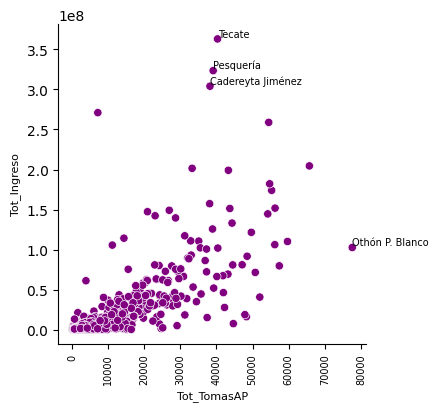

In [120]:
# @title
colors = ['purple']    #'green', 'purple', 'orange'
Col_Var_y=["Tot_Ingreso"]
Col_Var_x1=["Tot_TomasAP"]

g = sns.pairplot(
    df_clasif_3,
    x_vars=Col_Var_x1,
    y_vars=Col_Var_y,
    height=4,
    hue='cluster_Kmean',
    palette=colors
)
g._legend.remove()
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(axis='x', labelrotation=90, labelsize=7)


top_20_indices = df_clasif_3['Tot_Ingreso'].nlargest(3).index

# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'Tot_Ingreso'
        for idx in top_20_indices:
            row = df_clasif_3.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['NOM_MUN'],
                fontsize=7,
                ha='left',
                va='bottom'
            )


top_20_indices2 = df_clasif_3['Tot_TomasAP'].nlargest(3).index

# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'Tot_Ingreso'
        for idx in top_20_indices2:
            row = df_clasif_3.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['NOM_MUN'],
                fontsize=7,
                ha='left',
                va='bottom'
            )



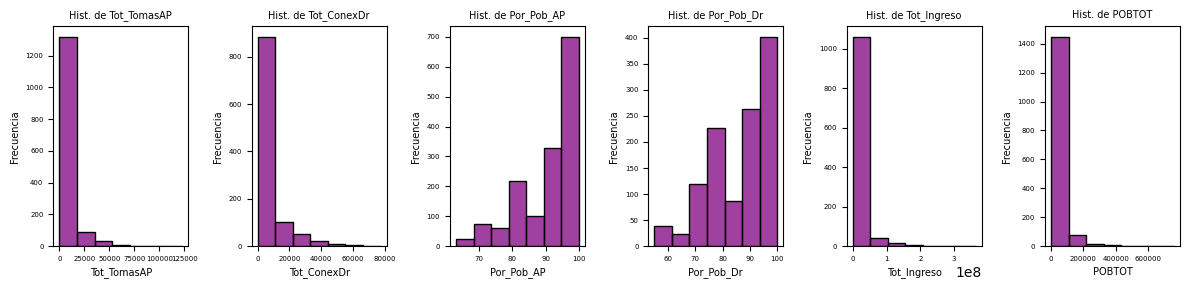

In [121]:
# @title
colors = ['purple']
variables = ['Tot_TomasAP', 'Tot_ConexDr', 'Por_Pob_AP','Por_Pob_Dr', 'Tot_Ingreso','POBTOT']
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(12, 3))
axes = axes.flatten()
for i, var in enumerate(variables):
    sns.histplot(df_clasif_3 [var], ax=axes[i], color=colors[0],bins=7)
    axes[i].set_title(f'Hist. de {var}', fontsize=7)
    axes[i].set_xlabel(var, fontsize=7)
    axes[i].set_ylabel('Frecuencia', fontsize=7)
    axes[i].tick_params(axis='x', labelsize=5)
    axes[i].tick_params(axis='y', labelsize=5)

plt.tight_layout()
plt.show()

### **5.2.5 Cluster Clase 2. Baja cobertura de agua pot. y alcantarillado**

In [122]:
df_clasif_2 = df_OAPAS_MG[df_OAPAS_MG['cluster_Kmean'] == "Clase 2"]
df_clasif_2.describe().T

,count,mean,std,min,25%,50%,75%,max
POBTOT,456.0,"23,428.5","31,041.7",296.0,"6,261.8","13,868.0","26,677.8","248,845.0"
Tot_TomasAP,439.0,"3,565.6","5,951.7",86.0,600.0,"1,700.0","3,500.0","58,183.0"
Tot_ConexDr,421.0,"2,243.7","3,704.3",10.0,350.0,991.0,"2,432.0","35,000.0"
Por_Pob_AP,451.0,63.5,26.1,10.0,44.0,70.0,80.0,100.0
Por_Pob_Dr,456.0,36.3,16.4,0.5,25.0,38.0,50.0,63.0
Tot_Ingreso,321.0,"5,225,153.7","15,870,601.9","3,390.0","134,560.0","625,800.0","2,513,804.4","142,660,111.2"
Pob/Tomas,439.0,12.7,16.6,1.0,4.5,6.8,13.1,143.3
Pob/ConexDr,421.0,37.9,133.7,1.1,6.7,12.3,26.1,"1,661.4"
Ingreso/PobTot,321.0,131.6,231.0,0.5,12.9,42.9,143.5,"2,194.6"
OutLayer,456.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


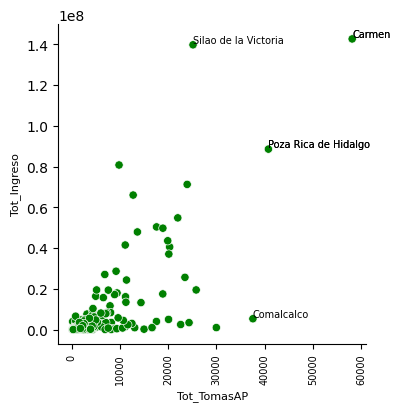

In [123]:
# @title
colors = ['green']    #'green', 'purple', 'orange'
Col_Var_y=["Tot_Ingreso"]
Col_Var_x1=["Tot_TomasAP"]

g = sns.pairplot(
    df_clasif_2,
    x_vars=Col_Var_x1,
    y_vars=Col_Var_y,
    height=4,
    hue='cluster_Kmean',
    palette=colors
)
g._legend.remove()
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(axis='x', labelrotation=90, labelsize=7)


top_20_indices = df_clasif_2['Tot_Ingreso'].nlargest(3).index

# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'Tot_Ingreso'
        for idx in top_20_indices:
            row = df_clasif_2.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['NOM_MUN'],
                fontsize=7,
                ha='left',
                va='bottom'
            )


top_20_indices2 = df_clasif_2['Tot_TomasAP'].nlargest(3).index

# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'Tot_Ingreso'
        for idx in top_20_indices2:
            row = df_clasif_2.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['NOM_MUN'],
                fontsize=7,
                ha='left',
                va='bottom'
            )



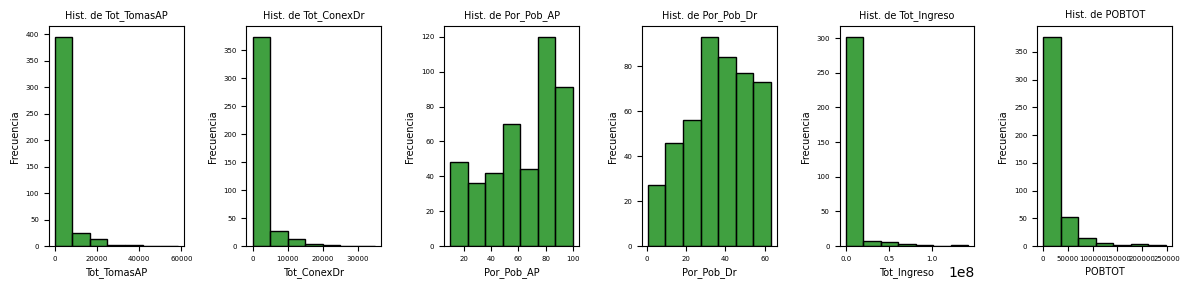

In [124]:
# @title
colors = ['green']
variables = ['Tot_TomasAP', 'Tot_ConexDr', 'Por_Pob_AP','Por_Pob_Dr', 'Tot_Ingreso','POBTOT']
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(12, 3))
axes = axes.flatten()
for i, var in enumerate(variables):
    sns.histplot(df_clasif_2 [var], ax=axes[i], color=colors[0],bins=7)
    axes[i].set_title(f'Hist. de {var}', fontsize=7)
    axes[i].set_xlabel(var, fontsize=7)
    axes[i].set_ylabel('Frecuencia', fontsize=7)
    axes[i].tick_params(axis='x', labelsize=5)
    axes[i].tick_params(axis='y', labelsize=5)

plt.tight_layout()
plt.show()

### **5.2.6 Cluster Clase 1. Muy baja cobertura de agua pot. y alcantarillado**

In [125]:
df_clasif_1 = df_OAPAS_MG[df_OAPAS_MG['cluster_Kmean'] == "Clase 1"]
df_clasif_1.describe().T

,count,mean,std,min,25%,50%,75%,max
POBTOT,343.0,"17,685.9","29,112.7",312.0,"3,072.5","6,932.0","18,443.0","269,790.0"
Tot_TomasAP,335.0,"2,067.7","3,512.1",40.0,348.5,800.0,"2,075.5","36,269.0"
Tot_ConexDr,171.0,"3,084.4","4,542.4",11.0,500.0,"1,578.0","3,979.5","39,983.0"
Por_Pob_AP,343.0,36.5,16.3,10.0,22.0,37.0,51.0,64.0
Por_Pob_Dr,183.0,80.4,12.9,45.0,70.0,80.0,90.0,100.0
Tot_Ingreso,222.0,"3,241,517.8","12,074,251.0","2,000.0","42,030.0","166,554.3","1,024,412.2","141,761,159.3"
Pob/Tomas,335.0,11.4,13.6,1.3,4.8,7.9,12.5,178.3
Pob/ConexDr,171.0,46.7,194.9,1.3,5.4,8.9,15.6,"1,932.2"
Ingreso/PobTot,222.0,83.1,139.0,0.5,9.0,29.2,90.0,996.6
OutLayer,343.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


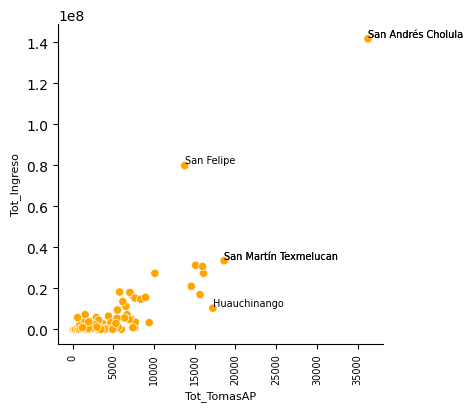

In [126]:
# @title
colors = ['orange']    #'green', 'purple', 'orange'
Col_Var_y=["Tot_Ingreso"]
Col_Var_x1=["Tot_TomasAP"]

g = sns.pairplot(
    df_clasif_1,
    x_vars=Col_Var_x1,
    y_vars=Col_Var_y,
    height=4,
    hue='cluster_Kmean',
    palette=colors
)
g._legend.remove()
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(axis='x', labelrotation=90, labelsize=7)


top_20_indices = df_clasif_1['Tot_Ingreso'].nlargest(3).index

# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'Tot_Ingreso'
        for idx in top_20_indices:
            row = df_clasif_1.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['NOM_MUN'],
                fontsize=7,
                ha='left',
                va='bottom'
            )


top_20_indices2 = df_clasif_1['Tot_TomasAP'].nlargest(3).index

# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'Tot_Ingreso'
        for idx in top_20_indices2:
            row = df_clasif_1.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['NOM_MUN'],
                fontsize=7,
                ha='left',
                va='bottom'
            )



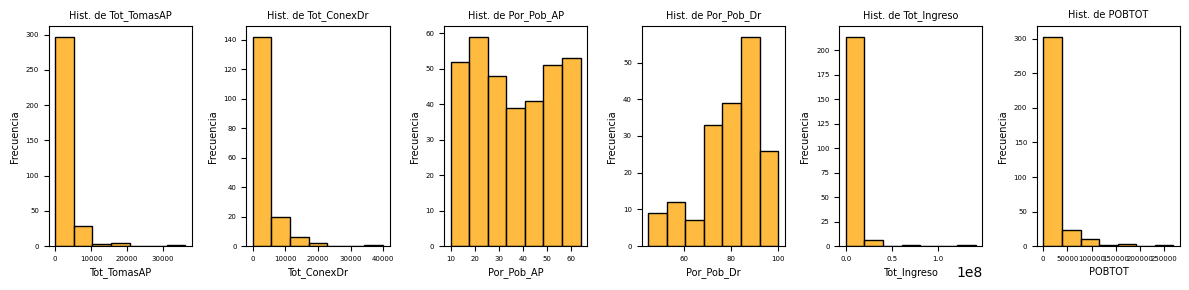

In [127]:
# @title
colors = ['orange']  #['red', 'blue', 'green', 'purple', 'orange']
variables = ['Tot_TomasAP', 'Tot_ConexDr', 'Por_Pob_AP','Por_Pob_Dr', 'Tot_Ingreso','POBTOT']
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(12, 3))
axes = axes.flatten()
for i, var in enumerate(variables):
    sns.histplot(df_clasif_1 [var], ax=axes[i], color=colors[0],bins=7)
    axes[i].set_title(f'Hist. de {var}', fontsize=7)
    axes[i].set_xlabel(var, fontsize=7)
    axes[i].set_ylabel('Frecuencia', fontsize=7)
    axes[i].tick_params(axis='x', labelsize=5)
    axes[i].tick_params(axis='y', labelsize=5)

plt.tight_layout()
plt.show()

## **5.3 Resumen Cluster**

In [128]:
df_OAPAS_MG[['cluster_Kmean', 'folio']].groupby('cluster_Kmean').count()

,folio
cluster_Kmean,
Clase 1,343
Clase 2,456
Clase 3,1555
Clase 4,61
Clase 5,17
Clase MG,5


In [129]:
cols=['cluster_Kmean','Tot_TomasAP', 'Tot_ConexDr', 'Por_Pob_Dr', 'Por_Pob_AP', 'POBTOT', 'Tot_Ingreso','Pob/Tomas', 'Pob/ConexDr',
       'Ingreso/PobTot']
pd.options.display.float_format = '{:,.0f}'.format
df_OAPAS_MG[cols].groupby('cluster_Kmean').mean().T

cluster_Kmean,Clase 1,Clase 2,Clase 3,Clase 4,Clase 5,Clase MG
Tot_TomasAP,"2,068","3,566","6,341","111,627","265,927","698,904"
Tot_ConexDr,"3,084","2,244","6,445","101,300","256,557","557,352"
Por_Pob_Dr,80,36,86,89,96,96
Por_Pob_AP,36,64,90,93,97,98
POBTOT,"17,686","23,429","34,018","489,266","872,988","1,374,262"
Tot_Ingreso,"3,241,518","5,225,154","12,899,288","422,869,970","1,094,301,596","2,904,362,967"
Pob/Tomas,11,13,8,5,3,2
Pob/ConexDr,47,38,26,6,4,3
Ingreso/PobTot,83,132,259,"1,163","1,278","1,738"


In [130]:
df_OAPAS_MG[cols].groupby('cluster_Kmean').max().T

cluster_Kmean,Clase 1,Clase 2,Clase 3,Clase 4,Clase 5,Clase MG
Tot_TomasAP,"36,269","58,183","122,871","253,819","356,964","1,170,135"
Tot_ConexDr,"39,983","35,000","77,347","200,040","331,865","1,164,305"
Por_Pob_Dr,100,63,100,100,100,100
Por_Pob_AP,64,100,100,100,100,100
POBTOT,"269,790","248,845","759,137","1,835,486","1,142,994","1,922,523"
Tot_Ingreso,"141,761,159","142,660,111","363,176,393","1,326,602,408","1,913,074,129","4,559,694,557"
Pob/Tomas,178,143,327,70,5,4
Pob/ConexDr,"1,932","1,661","1,872",73,6,4
Ingreso/PobTot,997,"2,195","3,349","3,988","2,195","2,381"


In [131]:
df_OAPAS_MG[cols].groupby('cluster_Kmean').min().T

cluster_Kmean,Clase 1,Clase 2,Clase 3,Clase 4,Clase 5,Clase MG
Tot_TomasAP,40,86,25,"21,209","159,115","469,797"
Tot_ConexDr,11,10,3,"20,109","159,115","65,505"
Por_Pob_Dr,45,0,55,5,84,90
Por_Pob_AP,10,10,63,57,80,94
POBTOT,312,296,130,"132,169","314,331","149,762"
Tot_Ingreso,"2,000","3,390","1,000","15,228,021","689,929,732","1,416,260,601"
Pob/Tomas,1,1,1,2,1,0
Pob/ConexDr,1,1,1,2,1,1
Ingreso/PobTot,1,0,0,10,738,837


**La siguiente tabla muestra el resumen de las principales características de las cinco clases identificadas con K-Means para segmentar a los Organismos Operadores de Agua en México**

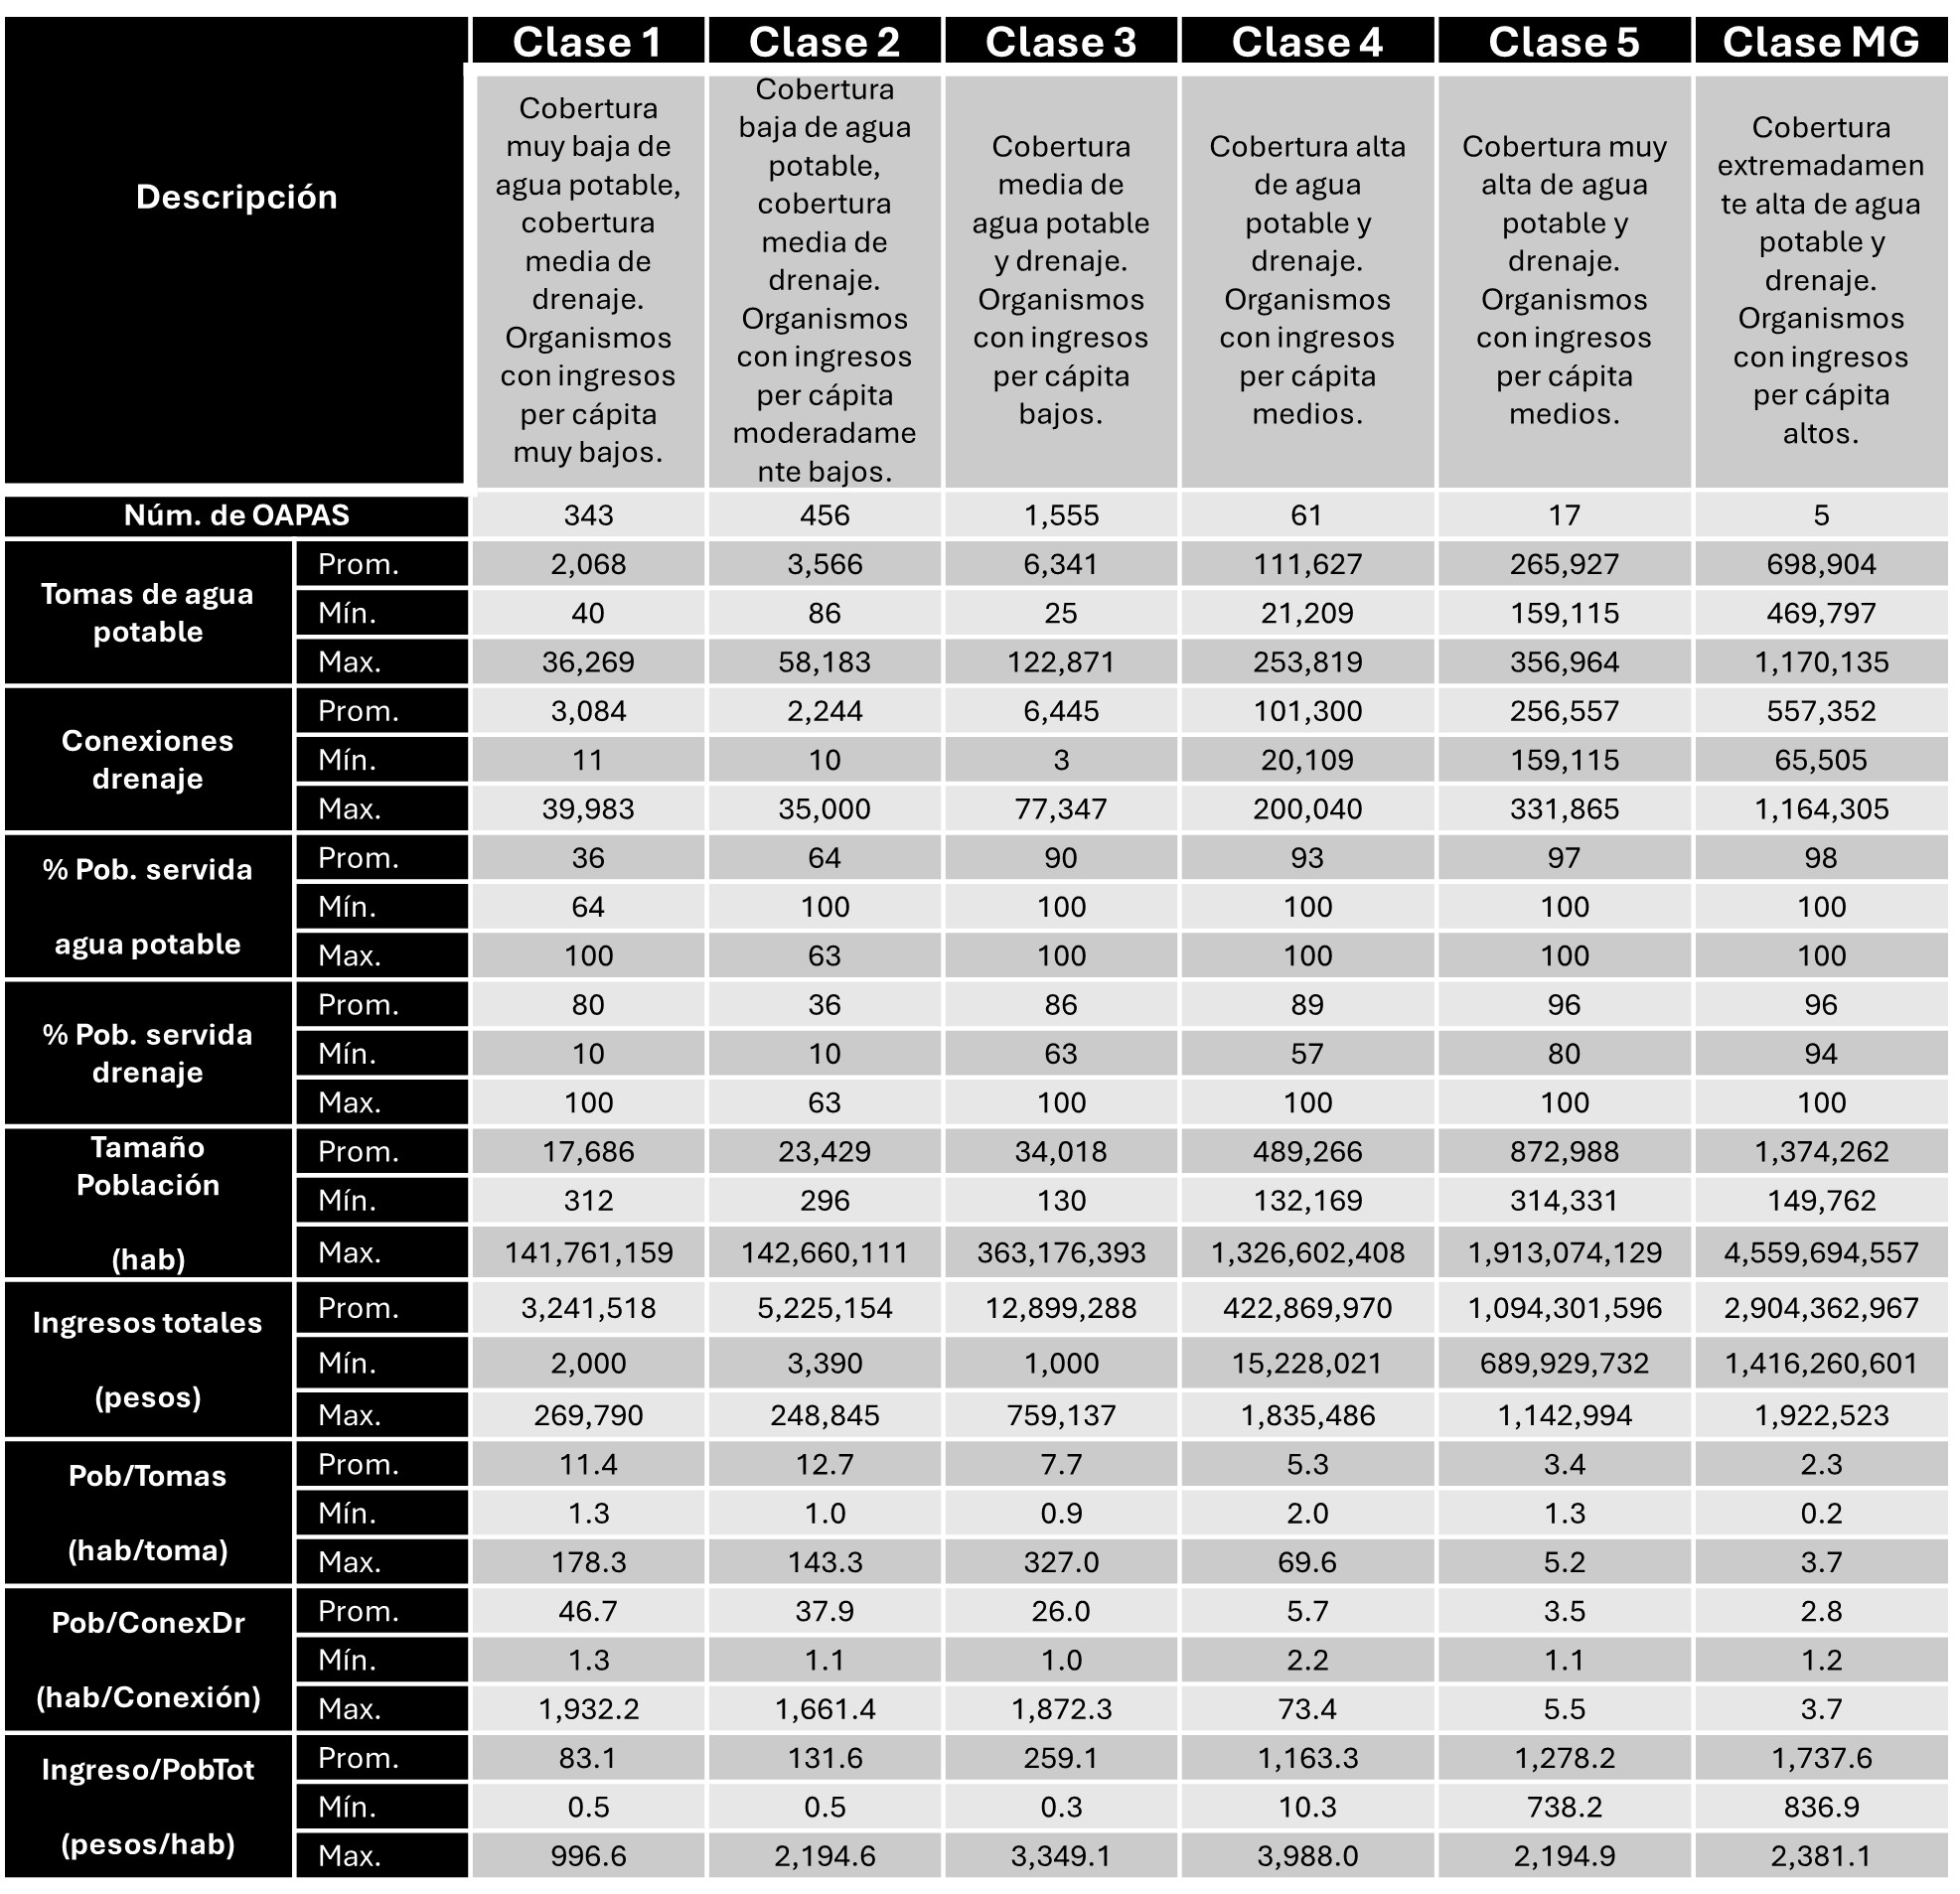

En los siguientes párrafos se describen las características de cada uno de los clusters identificados.

**Clase 1. Clase 1: Cobertura muy baja de agua potable, cobertura media de  drenaje. Organismos con ingresos per cápita muy bajos.**  


Esta clase se conforma por **343** folios lo que representa el **14%** del total. En esta clase solo un tercio de la población tiene acceso a agua potable, con grandes desigualdades, ya que el rango va desde un mínimo del 64% hasta un 100% en algunos casos. La cobertura de drenaje es relativamente mejor, con un promedio de 80%. Sin embargo, algunas áreas tienen muy baja cobertura, con un mínimo del 10%. En promedio, esta clase tiene una población de 17,686 habitantes, con un rango que va desde 312 hasta 141,761 habitantes. Los ingresos promedio de los organismos operadores municipales son de 3,241,518 pesos, con ingresos mínimos de 2,000 pesos y máximos de 269,790 pesos. En esta clase cada toma de agua potable abastece a 11.4 habitantes en promedio, lo que indica un servicio limitado. Esta relación puede llegar hasta 178 habitantes por toma. En términos de conexiones de drenaje, hay 47 habitantes por conexión, lo que también refleja una cobertura limitada. El ingreso promedio al Organismo Operador por habitante es muy bajo, con 83.1 pesos en promedio, reflejando la baja capacidad económica de esta clase.


**Clase 2. Cobertura baja de agua potable, cobertura baja de  drenaje. Organismos con ingresos per cápita moderadamente bajos.**  
Esta clase se conforma por **456** folios lo que representa el **18.7%** del total.
En esta clase aproximadamente dos tercios de la población tienen acceso a agua potable, lo que indica una baja cobertura, aunque algunas áreas alcanzan el 100%. La cobertura de drenaje es muy baja, con un promedio del 36%, y en algunas áreas el servicio llega solo al 10% de la población. Esta clase tiene un promedio de 23,429 habitantes, con una población que varía entre 296 y 142,660 habitantes. El ingreso promedio al Organismo Operador es de 5,225,154 pesos, con valores mínimos de 3,390 pesos y máximos de 248,845 pesos. En esta clase, cada toma de agua potable sirve a 13 habitantes en promedio, con un máximo de 143 habitantes por toma; en términos de drenaje, cada conexión sirve a 38 habitantes en promedio, y puede llegar hasta 1,661.4 habitantes por conexión. El ingreso promedio al Organismo Operador por habitante es de 131.6 pesos en promedio, lo que indica una capacidad de ingresos algo mejor que en la Clase 1.


**Clase 3. Cobertura media de agua potable y drenaje. Organismos con ingresos per cápita bajos.**  
Esta clase se conforma por **1,555** folios lo que representa el **63.8%** del total.
Esta clase muestra una excelente cobertura de agua potable, con el 90% de la población cubierta en promedio y varias áreas alcanzando una cobertura total del 100%. La cobertura de drenaje también es buena, con un promedio del 86%. Aunque la mayoría de las áreas están bien cubiertas, algunas tienen una cobertura mínima del 63%. Esta clase tiene una población más amplia, con un promedio de 34,018 habitantes, variando entre 130 y 363,176 habitantes. Los ingresos son significativamente más altos, con un promedio de 12,899,288 pesos, y un rango entre 1,000 pesos y 759,137 pesos. La relación Pob/Tomas mejora a 8 habitantes por toma, con un máximo de 327 habitantes por toma, lo que representa una mejor cobertura de agua potable. En esta clase cada conexión de drenaje sirve a 26 habitantes en promedio. El ingreso por habitante en esta clase es de 259.1 pesos, lo que refleja una mejor capacidad de generación de ingresos para los organismos operadores.


**Clase 4. Cobertura alta de agua potable y drenaje. Organismos con ingresos per cápita medios.**  
Esta clase se conforma por **61** folios lo que representa el **2.5%** del total.
La cobertura de agua potable es alta, con un promedio del 93%, y muchas áreas alcanzan el 100% de cobertura, lo que indica un servicio eficiente. La cobertura de drenaje es igualmente alta, con un promedio del 89%, aunque algunas áreas tienen una cobertura mínima del 57%. Esta clase abarca municipios con poblaciones grandes, con un promedio de 489,266 habitantes, y un rango entre 132,169 y 1,326,602 habitantes. Los ingresos de los organismos operadores son mucho más altos, con un promedio de 422,869,970 pesos y un máximo de 1,835,486 pesos. En esta clase cada toma de agua potable abastece a 5 habitantes en promedio, lo que refleja una excelente cobertura de agua y las conexiones de drenaje cubren a 6 habitantes en promedio por conexión, mostrando un buen equilibrio en la cobertura de servicios. El ingreso por habitante al Organismo Operador es de 1,163.3 pesos, lo que muestra un mejor ingreso que las clases 1,2 y 3.



**Clase 5. Cobertura muy  alta de agua potable y drenaje. Organismos con ingresos per cápita medios.**  
Esta clase se conforma por **17** folios lo que representa el **0.7%** del total.
En esta clase, casi toda la población tiene acceso a agua potable, con un promedio del 97% y muchas áreas alcanzando el 100%. La cobertura de drenaje es muy alta, con un promedio del 96%, y en algunas áreas, el 100% de la población está servida. El mínimo del 80% aún indica una muy buena cobertura. Esta clase incluye ciudades muy grandes, con un promedio de 872,988 habitantes, y un rango entre 314,331 y 1,913,074 habitantes. Los ingresos en esta clase son altos, con un promedio de 1,094,301,596 pesos y un máximo de 1,142,994 pesos. En esta clase cada toma de agua potable cubre a 3.4 habitantes en promedio, lo que refleja una cobertura prácticamente completa y las conexiones de drenaje sirven a 3.5 habitantes por conexión, lo que demuestra una alta eficiencia en el servicio. El ingreso promedio por habitante al Organismo Operador es de 1,278.2 pesos.


**Clase 6. Cobertura extremadamente alta de agua potable y drenaje. Organismos con ingresos per cápita altos.**  
Esta clase se conforma por **5** folios lo que representa el **2%** del total y esta conformada por los municipios de **Tijuana, Guadalajara, León, Puebla y Colima**. Estas ciudades tienen casi una cobertura total de agua potable, con un promedio del 98%, y muchas alcanzan el 100% de cobertura. La cobertura de drenaje también es excelente, con un promedio del 96%, y todas las áreas tienen al menos el 94% de cobertura. Esta clase agrupa a las ciudades más grandes y densas de todas, con un promedio de 1,374,262 habitantes, alcanzando hasta 4,559,694 habitantes. Los ingresos al Organismo Operador son los más altos, con un promedio de 2,904,362,967 pesos, y un máximo que llega a 1,922,523 pesos. La relación Pob/Tomas es la mejor, con 2.3 habitantes por toma, lo que refleja una cobertura casi total del servicio de agua potable. En esta clase cada conexión de drenaje cubre a 2.8 habitantes, lo que confirma la eficiencia de las conexiones de drenaje. El ingreso por habitante es el más alto, con 1,737.6 pesos, lo que refleja la mejor capacidad económica de estas ciudades.


# **6. Conclusiones**  
_____

El análisis realizado en este proyecto permitió identificar patrones clave en la relación entre la población, el acceso a los servicios de agua y drenaje, y los ingresos generados por los prestadores de los servicios de agua potable, alcantarillado y saneamiento que se encuentran en México utilizando los datos abiertos de INEGI.

El análisis de datos mostró que municipios con valores atípicos, como Ixtapaluca, que mostró ingresos excepcionalmente altos, así como algunos municipios correspondientes a Ciudades de gran tamaño como Tijuana, Guadalajara, León, Puebla y Colima que requieren un análisis diferenciado debido a su tamaño.  

La detección y eliminación de valores atípicos fue crucial en este análisis para obtener una visión más clara de los datos. Tras eliminar estos valores, se observó que la mayor parte de los municipios sigue un comportamiento esperado en términos de proporción de tomas de agua y conexiones de drenaje por habitante. Es importante indicar que la detección y eliminación de valores atípicos  acentúa la importancia de tener una base de datos limpia y libre de outliers para realizar un diagnóstico más preciso de la cobertura de servicios y las necesidades de mejora en la infraestructura y gestión municipal.

El uso de la técnica de segmentación de datos implentada (KMeans) en este proyecto permitió agrupar municipios con características similares mediante 5 clusters.  Los clusters muestran una clara diferenciación en términos de acceso a los servicios de agua potable y drenaje, así el ingreso de los organismos operadores municipales. Las clases identificadas muestran que a medida que se avanza de la Clase 1 a la Clase 6, se observa un aumento en la cobertura de servicios y en los ingresos per cápita, destacando un mayor equilibrio en la distribución de recursos en los municipios de mayor tamaño.  

En conclusión, la segmentación de las 5 clases muestra la disparidad en la provisión de servicios así como el ingreso económico a los organismos operadores, destacando que las áreas con mayor densidad de población disfrutan de una mejor infraestructura y servicios, mientras que las áreas rurales o más pequeñas enfrentan grandes desafíos en la cobertura y financiamiento de estos servicios básicos. El uso de la técnica de segmentación podrá facilitar el análisis y diseño de estrategias personalizadas para mejorar la gestión de recursos hídricos y servicios sanitarios, especialmente en las áreas donde los servicios no están optimizados.
